In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-pred/values.csv
/kaggle/input/heart-disease-pred/labels.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score,roc_curve

In [4]:
df1 = pd.read_csv('/kaggle/input/heart-disease-pred/labels.csv')

In [5]:
df2 = pd.read_csv('/kaggle/input/heart-disease-pred/values.csv')

In [6]:
df =pd.merge(df2,df1)

In [7]:
df.head(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [8]:
df.tail(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [9]:
df.shape

(180, 15)

In [10]:
print(str(len(df.index)))

180


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [13]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

## EDA

### Univariate Analysis

In [14]:
df.heart_disease_present.value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

In [15]:
temp_dict = {'variable Name':[], 'Unique Value Count':[]}
for column in df.columns:#for loop to acess columns form dataset
    temp_dict['variable Name'].append(column)
    temp_dict['Unique Value Count'].append(len(df[column].unique()))

df_datatype = pd.DataFrame(temp_dict)

In [16]:
df_datatype = df_datatype.sort_values(by = ['Unique Value Count'], ascending = True).reset_index(drop = True)
df_datatype

,variable Name,Unique Value Count
0,fasting_blood_sugar_gt_120_mg_per_dl,2
1,sex,2
2,exercise_induced_angina,2
3,heart_disease_present,2
4,slope_of_peak_exercise_st_segment,3
5,thal,3
6,resting_ekg_results,3
7,chest_pain_type,4
8,num_major_vessels,4
9,oldpeak_eq_st_depression,34


##### Remarks:
The dataset can be segmented into categorical and continuous data type
- numerical/discrete Data Type
    - fasting_blood_sugar_gt_120_mg_per_dl
    - sex
    - exercise_induced_angina
    - heart_disease_present
    - slope_of_peak_exercise_st_segment
    - resting_ekg_results
    - chest_pain_type
    - num_major_vessels
    
- numerical/continuous Data Type
    - oldpeak_eq_st_depression
    - resting_blood_pressure
    - age
    - max_heart_rate_achieved
    - serum_cholesterol_mg_per_dl
    
- Categorical Data Type
    - thal
    
    
Note: patient_id will be dropped since it is 100% unique
    

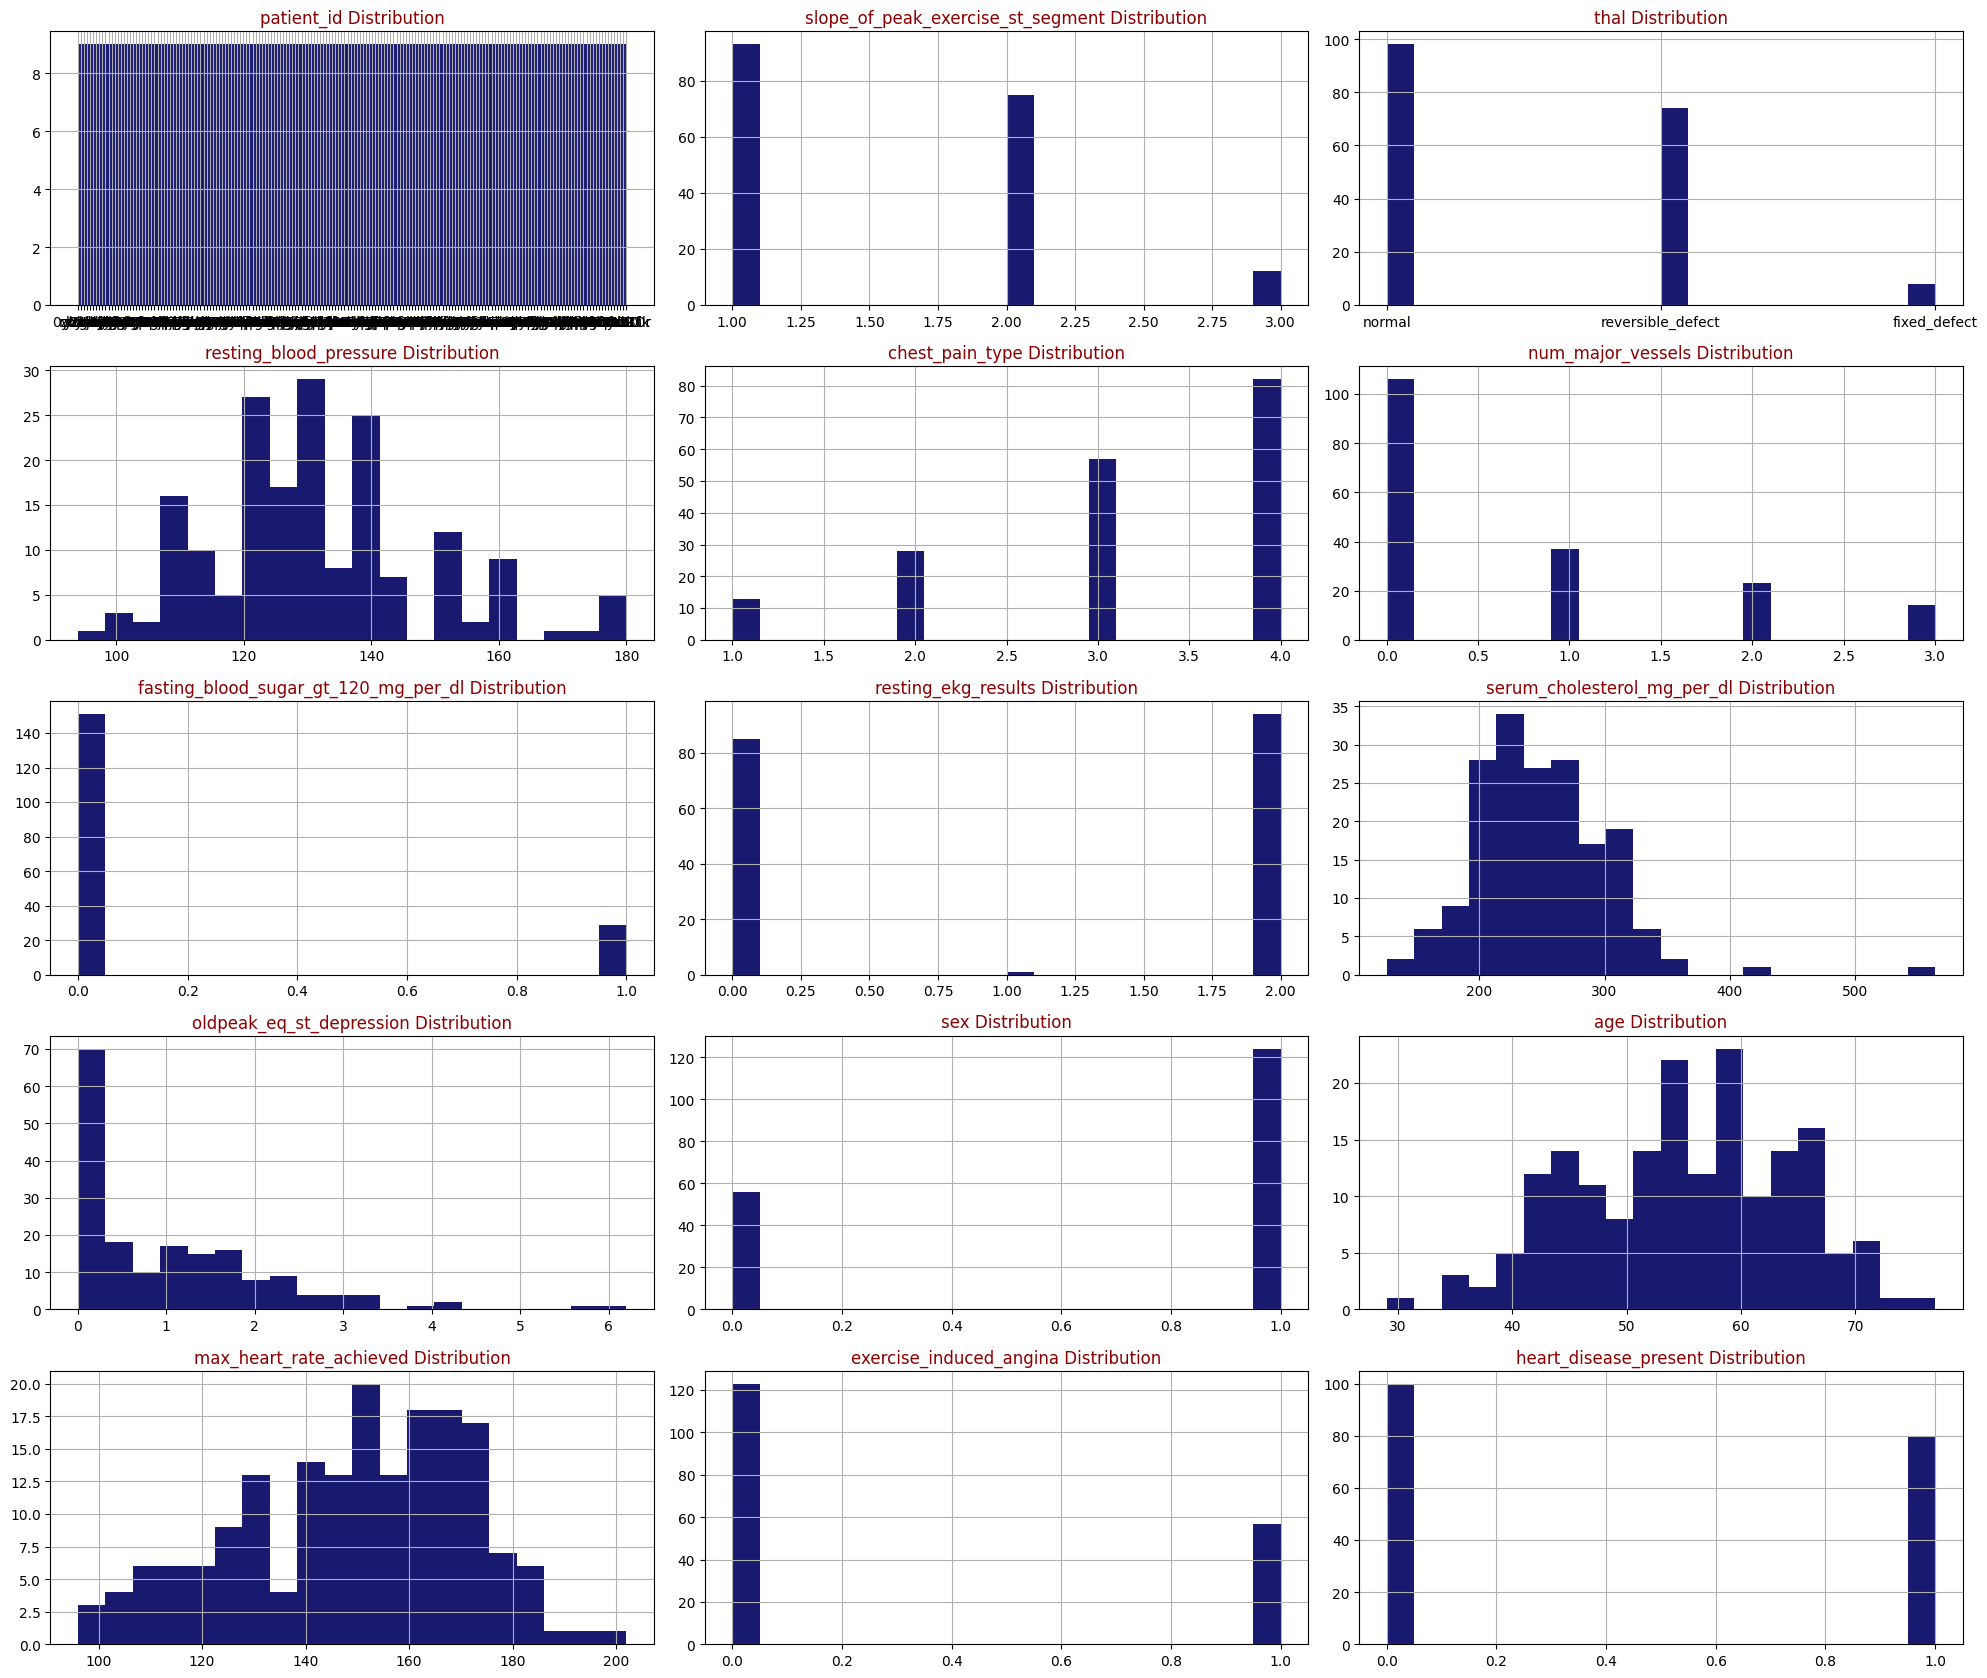

In [17]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

<Axes: xlabel='heart_disease_present', ylabel='count'>

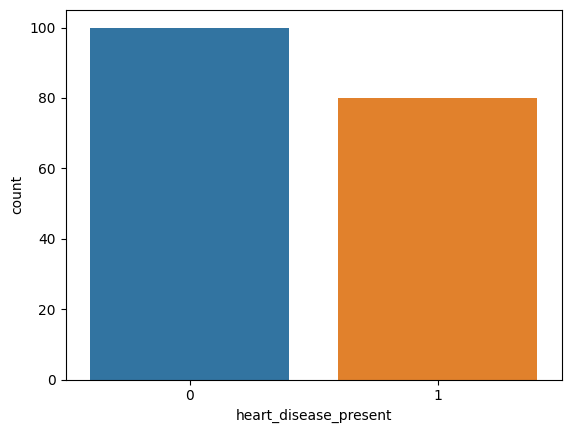

In [18]:
sns.countplot(x="heart_disease_present", data=df, )

##### Remarks:
- The chart shows the dataset target variable is imbalanced
    - Implement oversampling in the final dataframe

In [19]:
countNoDisease = len(df[df.heart_disease_present == 0])
countHaveDisease = len(df[df.heart_disease_present == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.heart_disease_present))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.heart_disease_present))*100)))

Percentage of Patients Haven't Heart Disease: 55.56%
Percentage of Patients Have Heart Disease: 44.44%


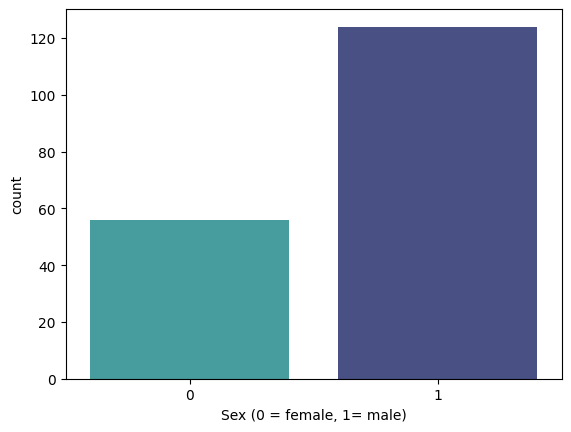

In [20]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [21]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.11%
Percentage of Male Patients: 68.89%


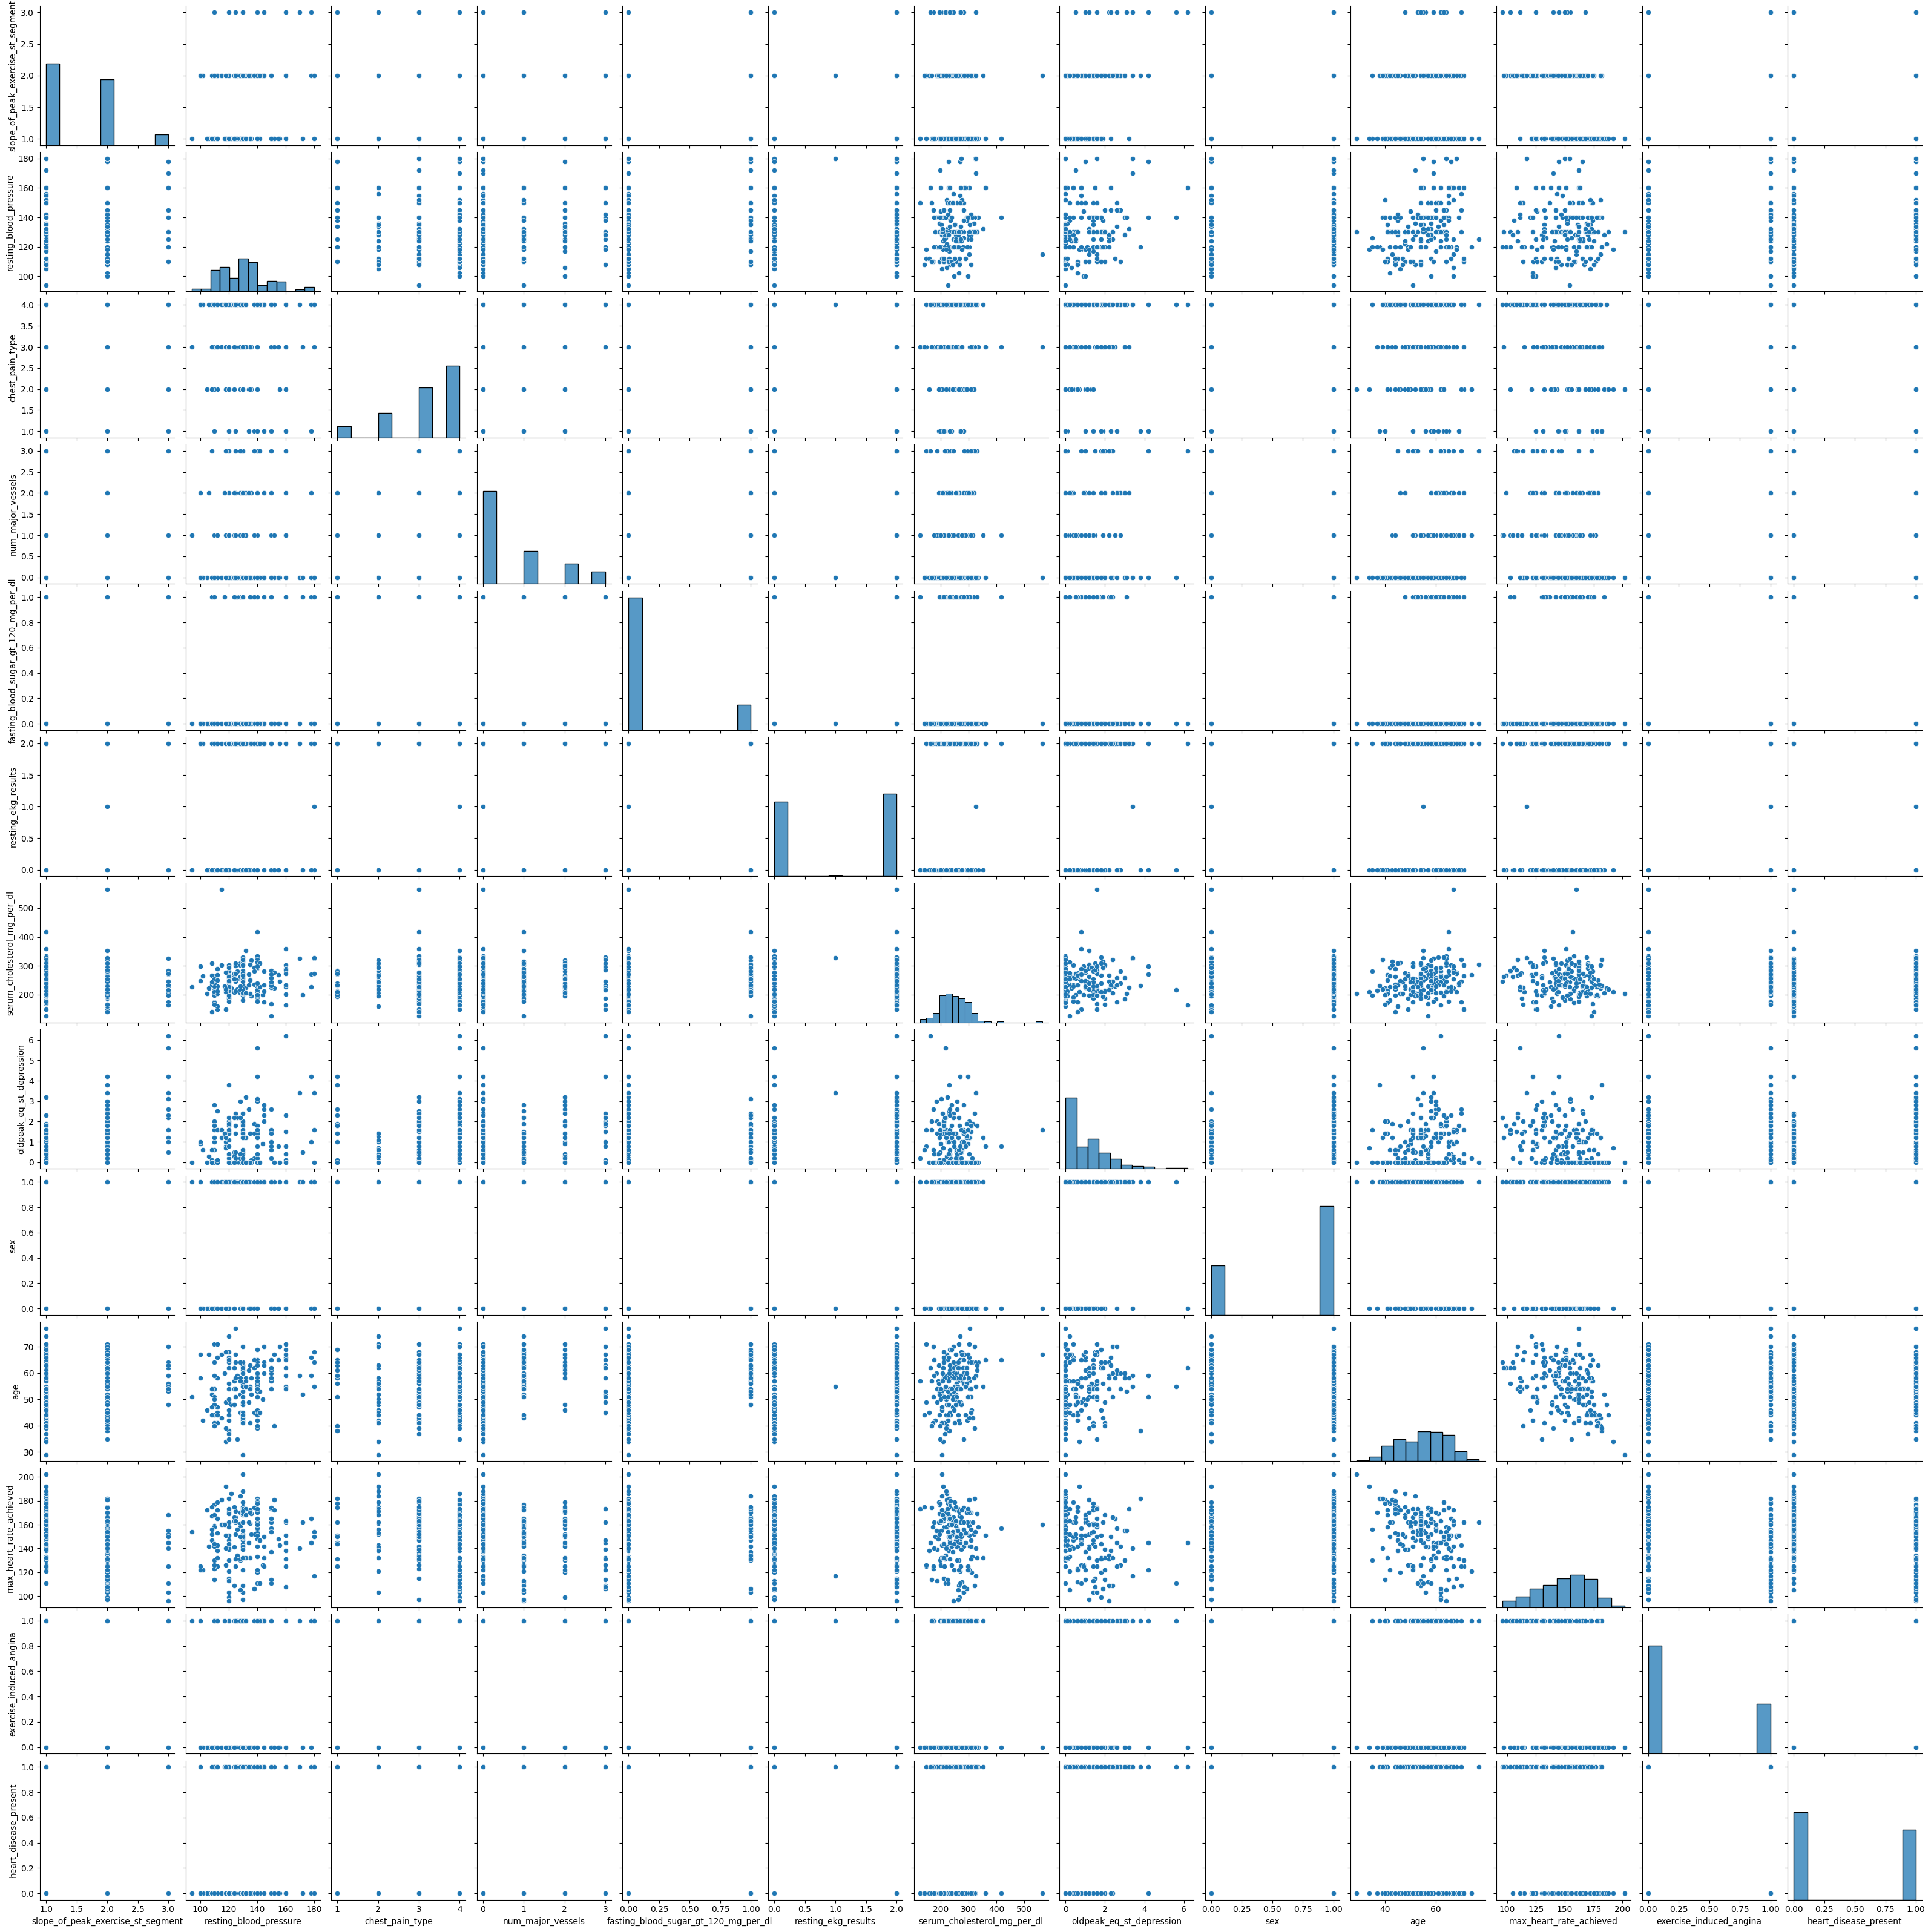

In [22]:
sns.pairplot(df)

In [25]:
# df.groupby('heart_disease_present').mean()

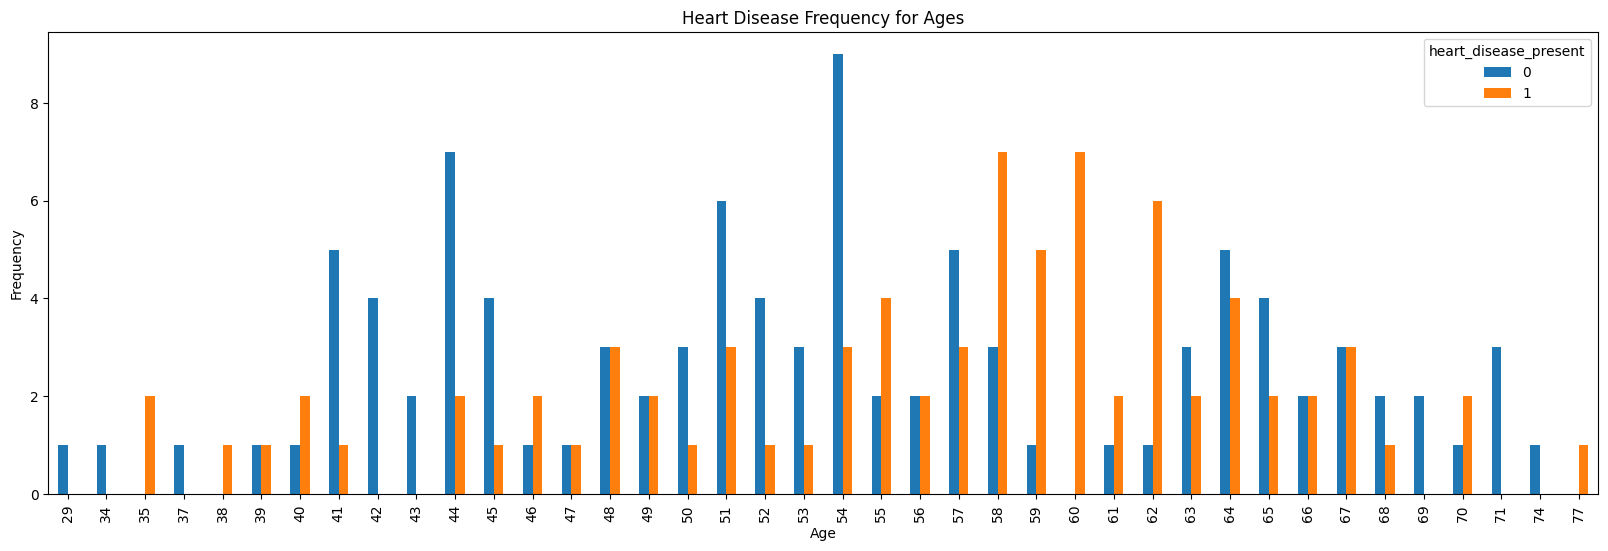

In [24]:
pd.crosstab(df.age,df.heart_disease_present).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

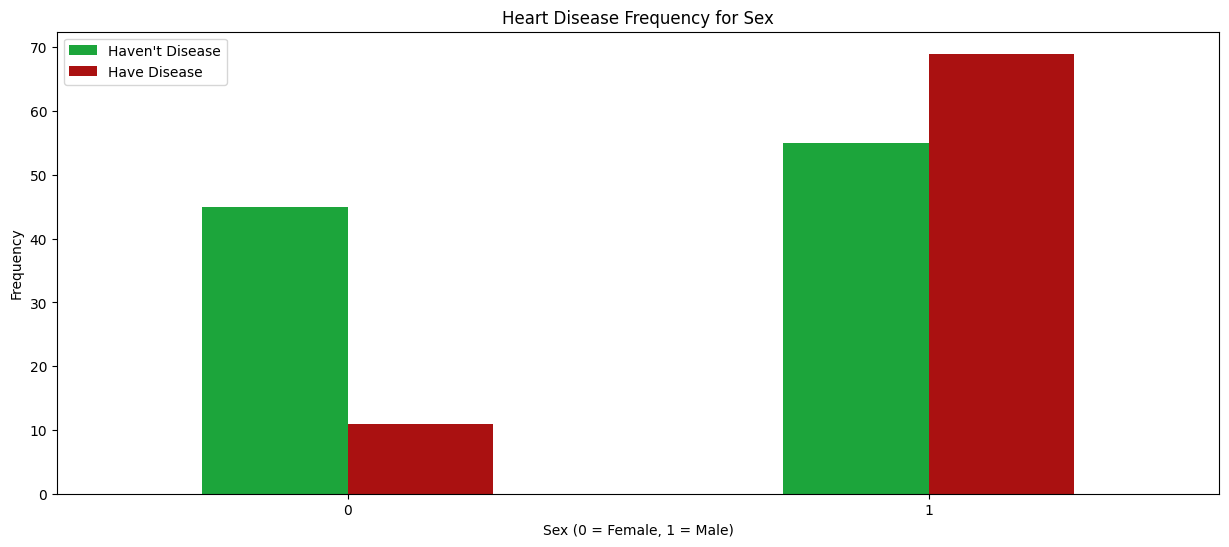

In [26]:
pd.crosstab(df.sex,df.heart_disease_present).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

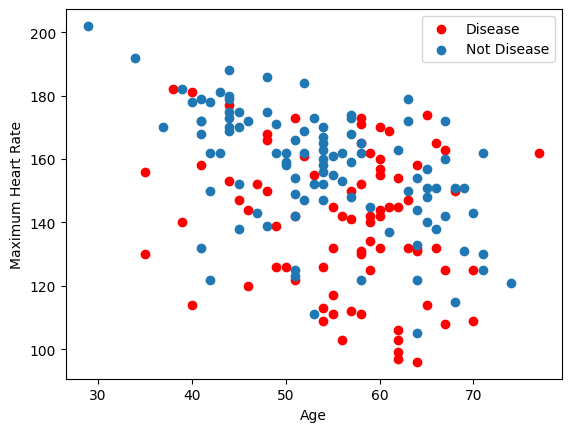

In [27]:
plt.scatter(x=df.age[df.heart_disease_present==1], y=df.max_heart_rate_achieved[(df.heart_disease_present==1)], c="red")
plt.scatter(x=df.age[df.heart_disease_present==0], y=df.max_heart_rate_achieved[(df.heart_disease_present==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


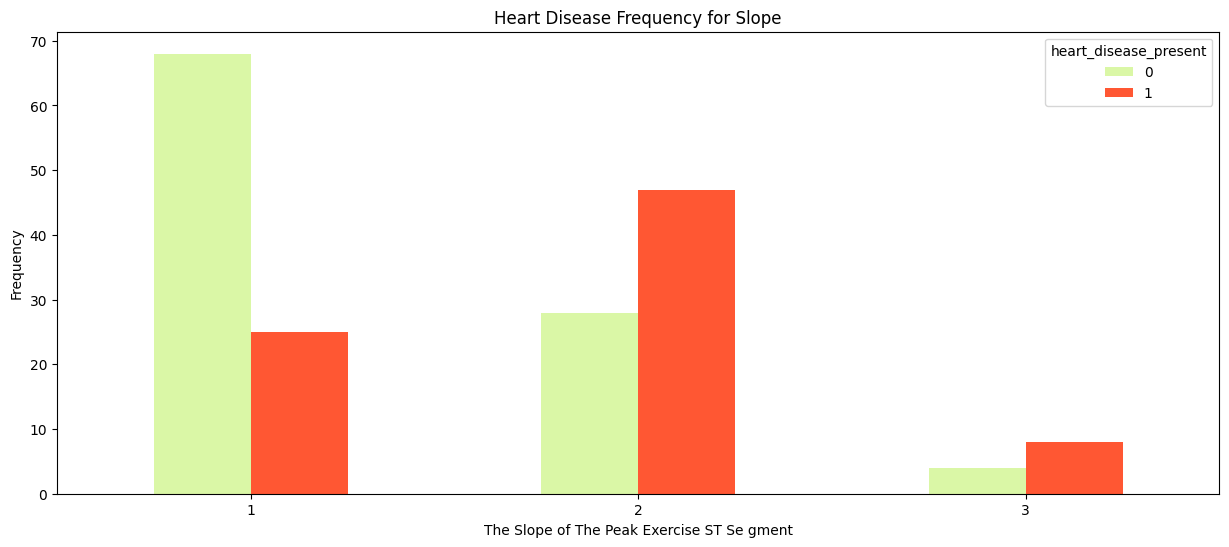

In [28]:
pd.crosstab(df.slope_of_peak_exercise_st_segment,df.heart_disease_present).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Se gment')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

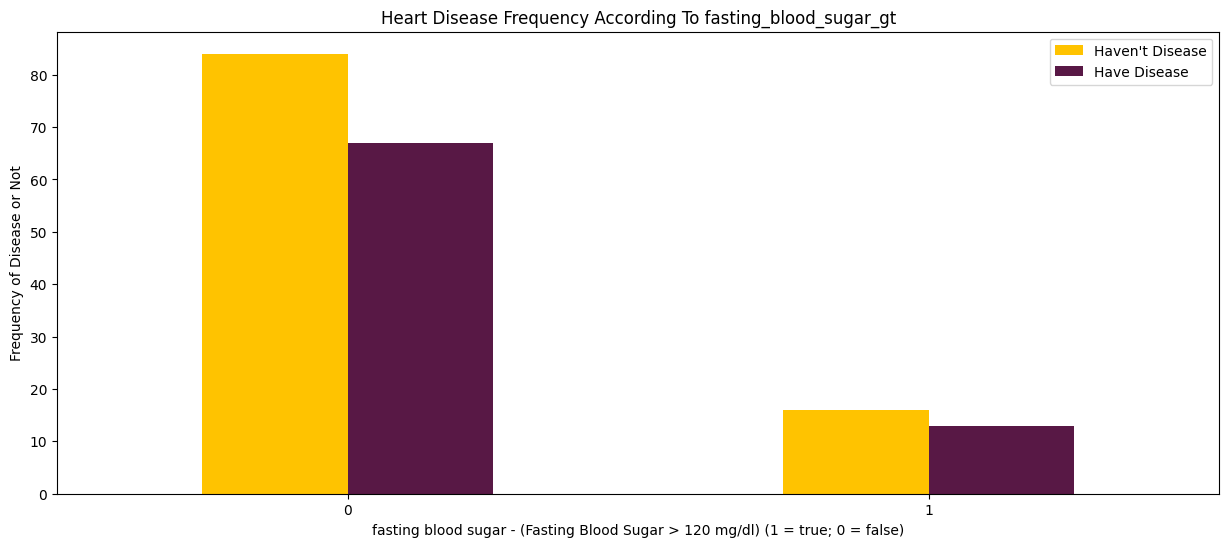

In [29]:
pd.crosstab(df.fasting_blood_sugar_gt_120_mg_per_dl,df.heart_disease_present).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To fasting_blood_sugar_gt')
plt.xlabel('fasting blood sugar - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

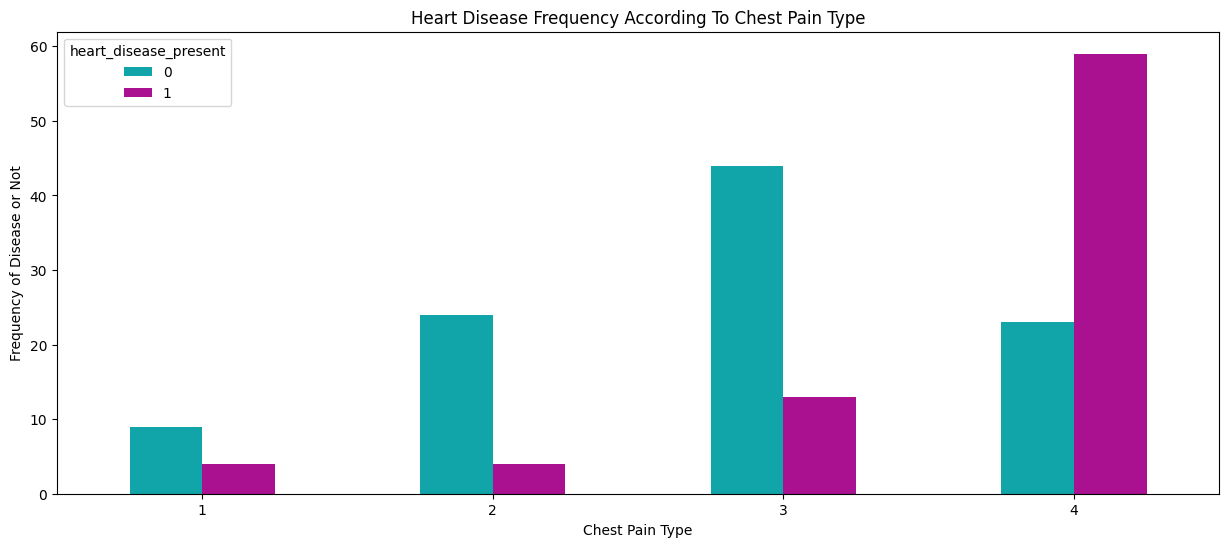

In [30]:
pd.crosstab(df.chest_pain_type,df.heart_disease_present).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

## Compare Resting Blood Preasure As Per Sex Column

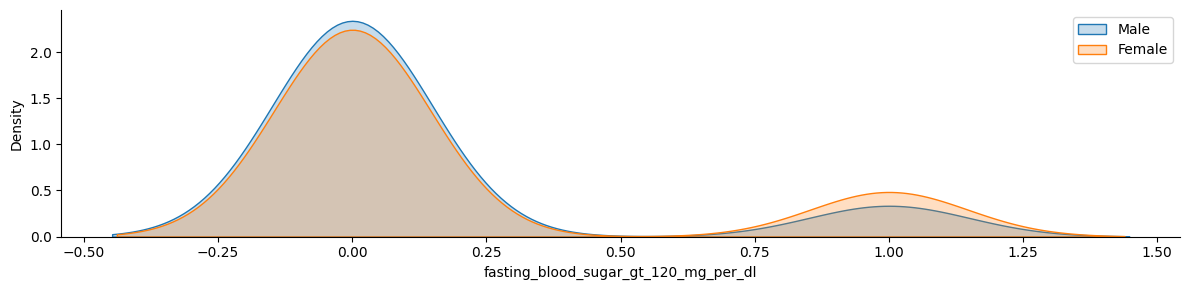

In [31]:
#facetgrid() is useful when u want to visualize the distribution of 2 variables or multivariables separately
g = sns.FacetGrid(df,hue="sex",aspect=4)
g.map(sns.kdeplot, 'fasting_blood_sugar_gt_120_mg_per_dl', shade=True)
plt.legend(labels=['Male', 'Female'])

In [32]:
categorical_list = df_datatype.loc[:8,'variable Name'].tolist()
continuous_list = df_datatype.loc[9:,'variable Name'].tolist()



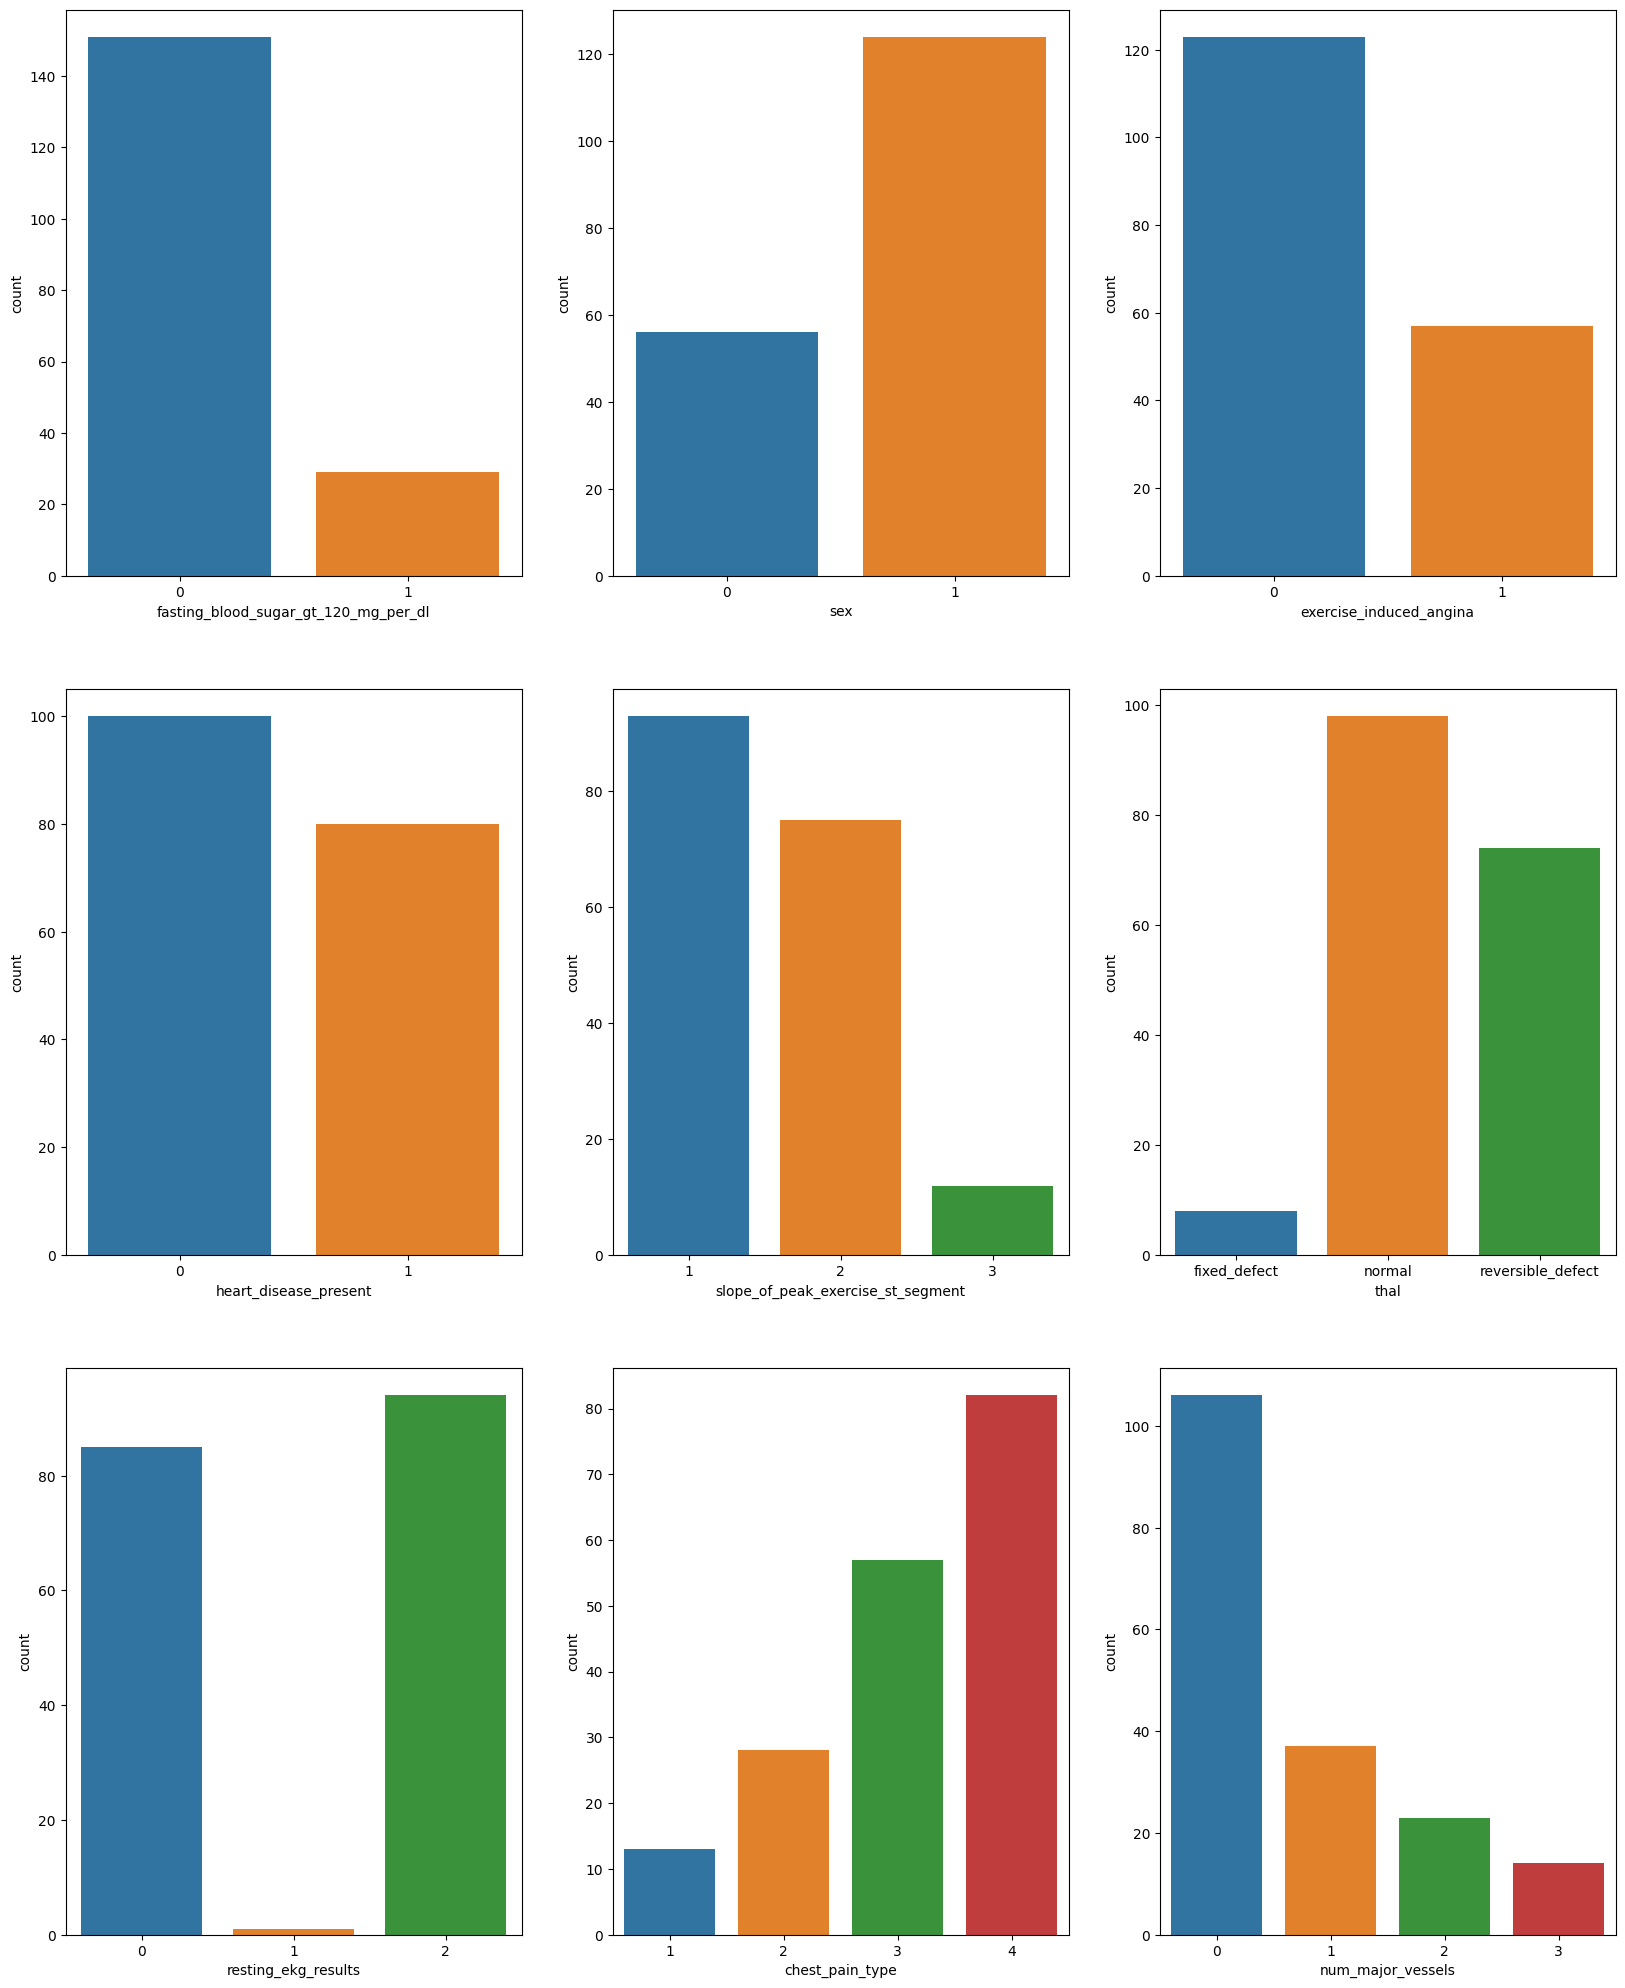

In [33]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size

# initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 
plotnumber = 1 

for column in categorical_list: # iteration of columns / acessing the columns from  dataset
    ax = plt.subplot(3,3,plotnumber)
    temp_df = df.pivot_table(index = column,values = 'patient_id', aggfunc = 'count').rename(columns = {'patient_id':'count'})
    sns.barplot(data = temp_df, x = temp_df.index, y = 'count')
    plotnumber += 1
plt.show()

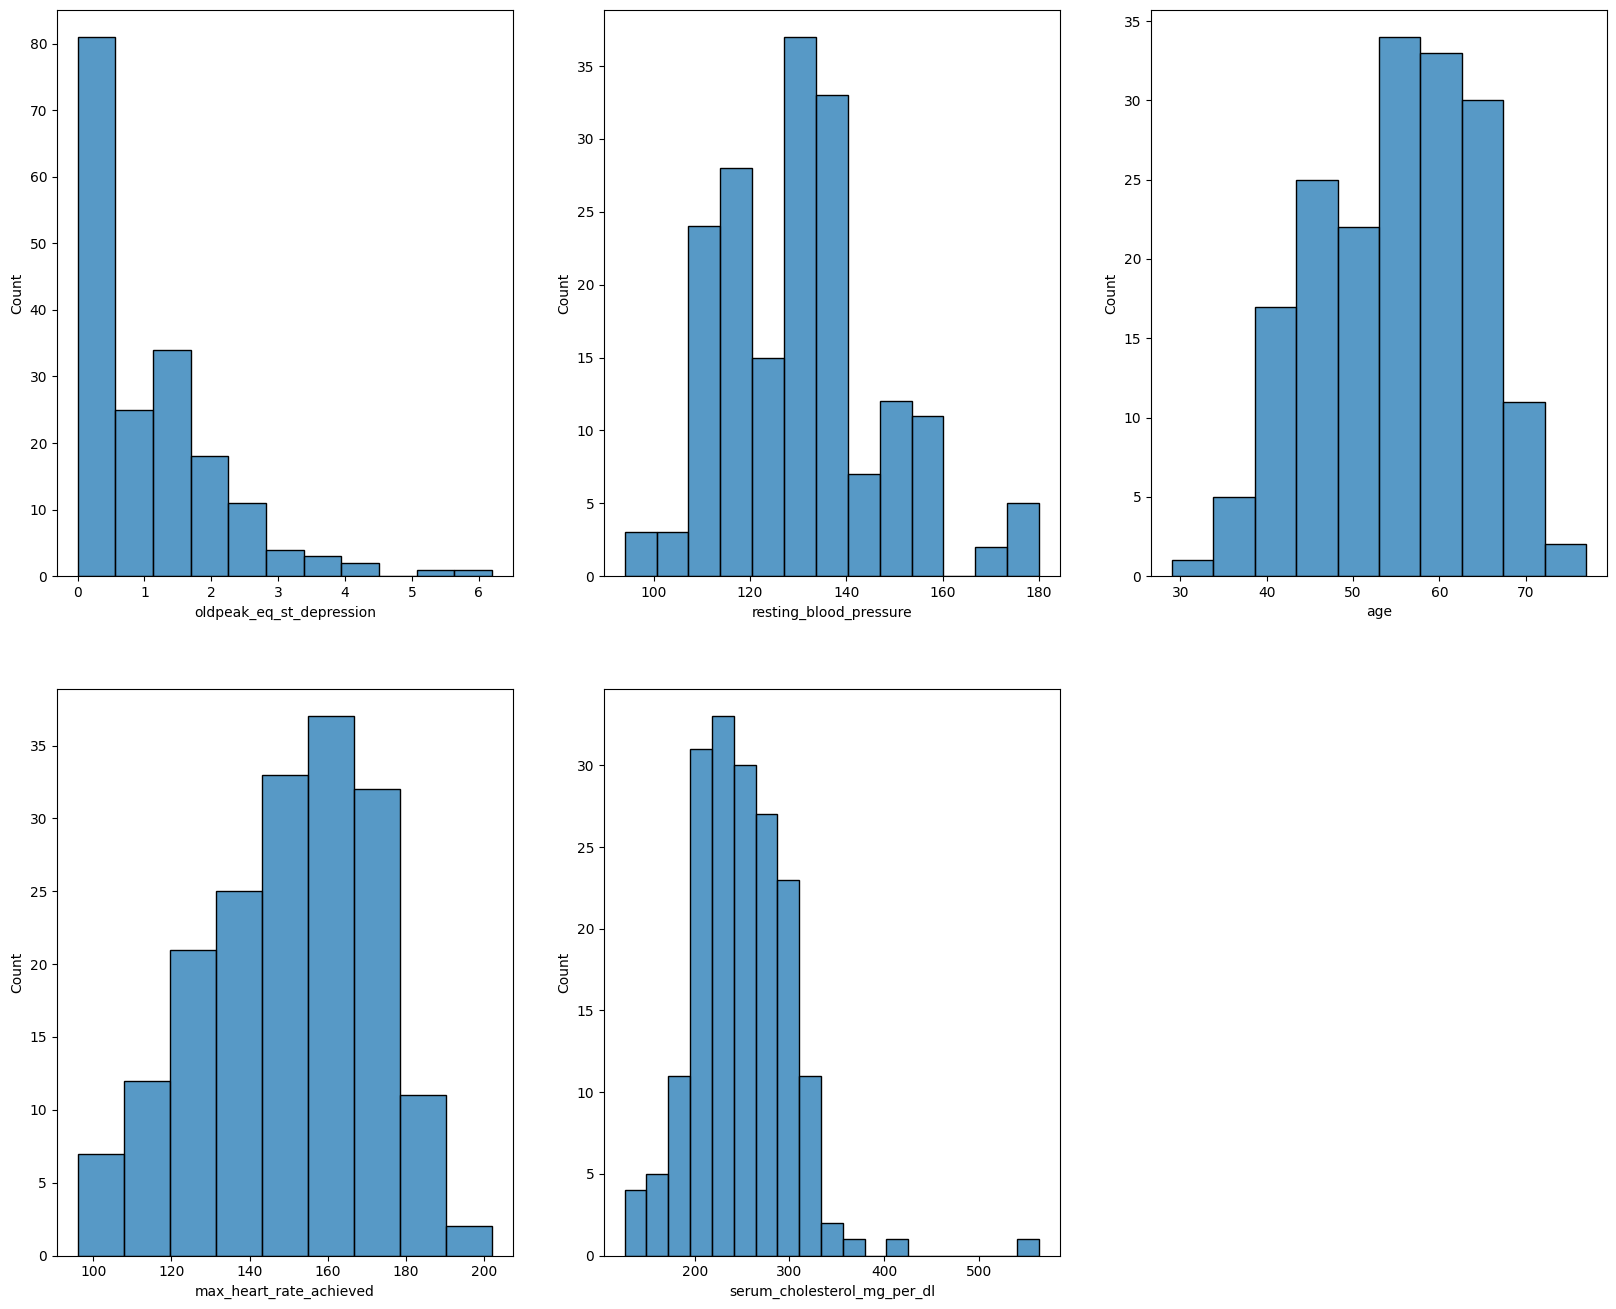

In [34]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size

# initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 
plotnumber = 1 

for column in [x for x in continuous_list if x != 'patient_id']: # iteration of columns / acessing the columns from  dataset
    ax = plt.subplot(3,3,plotnumber)
#     temp_df = df.pivot_table(index = column,values = 'patient_id', aggfunc = 'count').rename(columns = {'patient_id':'count'})
#     sns.barplot(data = temp_df, x = temp_df.index, y = 'count')
    sns.histplot(x=df[column])
    plotnumber += 1
plt.show()

### Bivariate Analysis

In [35]:
combined_list = [x for x in (categorical_list + continuous_list) if x != 'patient_id']

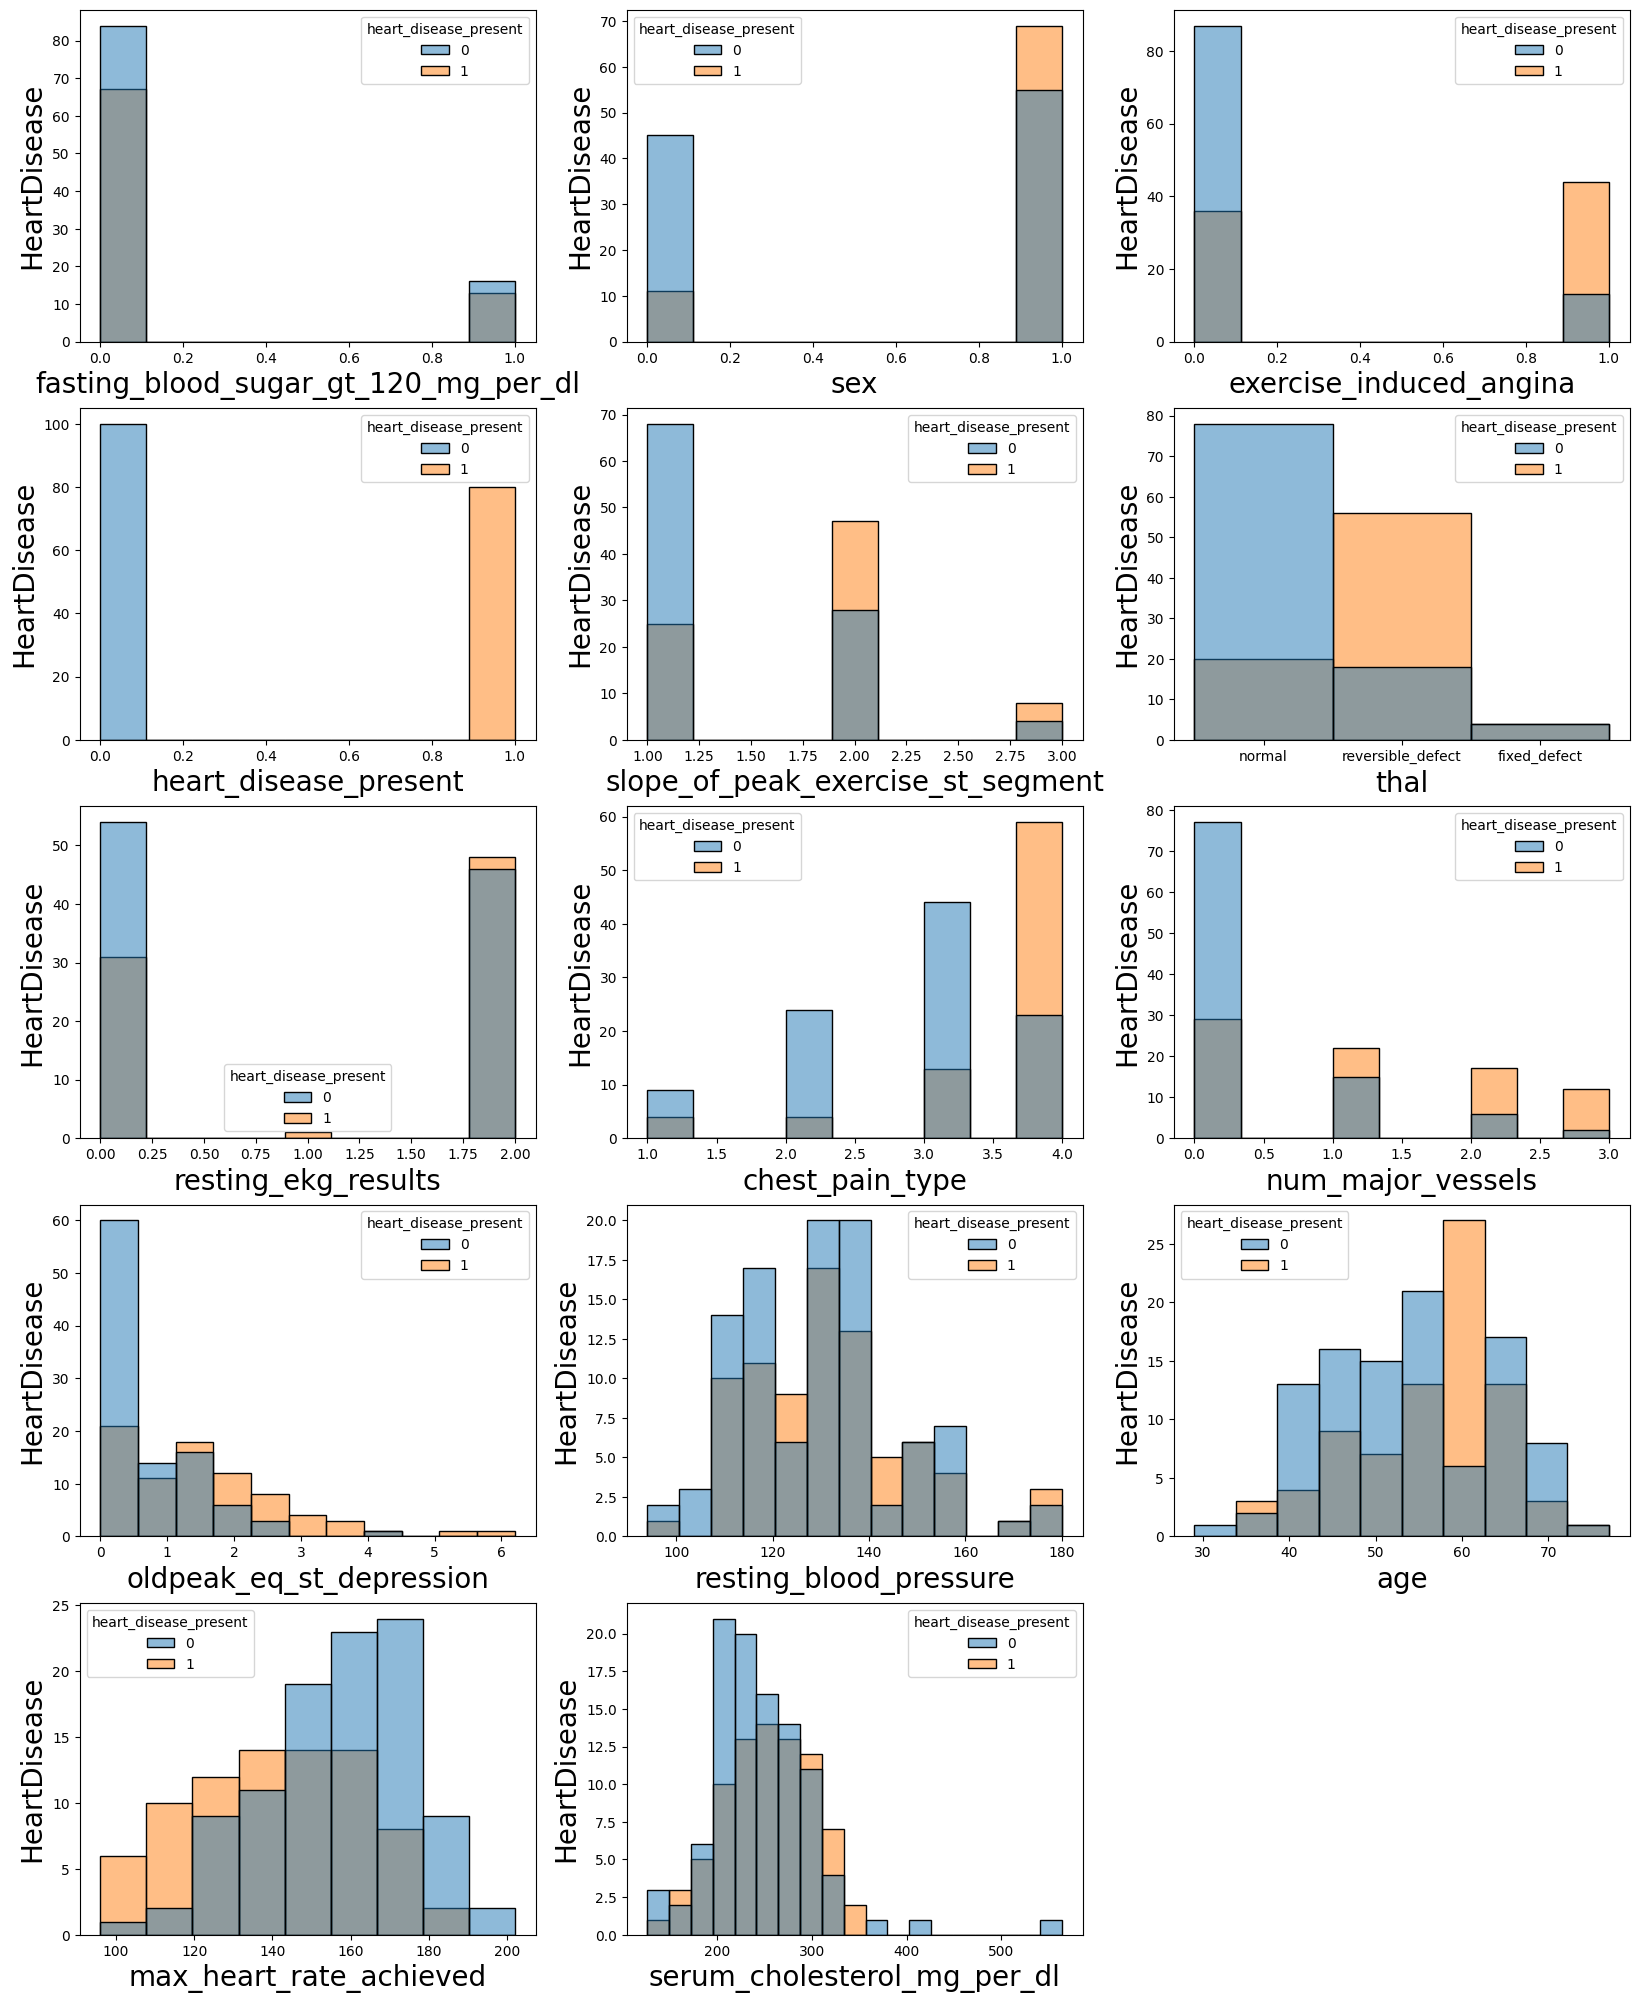

In [36]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in combined_list: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=15 :     # as there are 9 columns in the data
        ax = plt.subplot(5,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=df[column],hue=df.heart_disease_present) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        plt.ylabel('HeartDisease',fontsize=20)#assigning name to y-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber 
plt.show()

##### Remarks:
- patient with heart diseases shows lower max heart rate
- serum_cholesterol_mg_per_dl has outliers
- dataset's age range is from 30 to 80 years old
- resting_ekg_results with 1 value has insignificant count 

## Heat Map

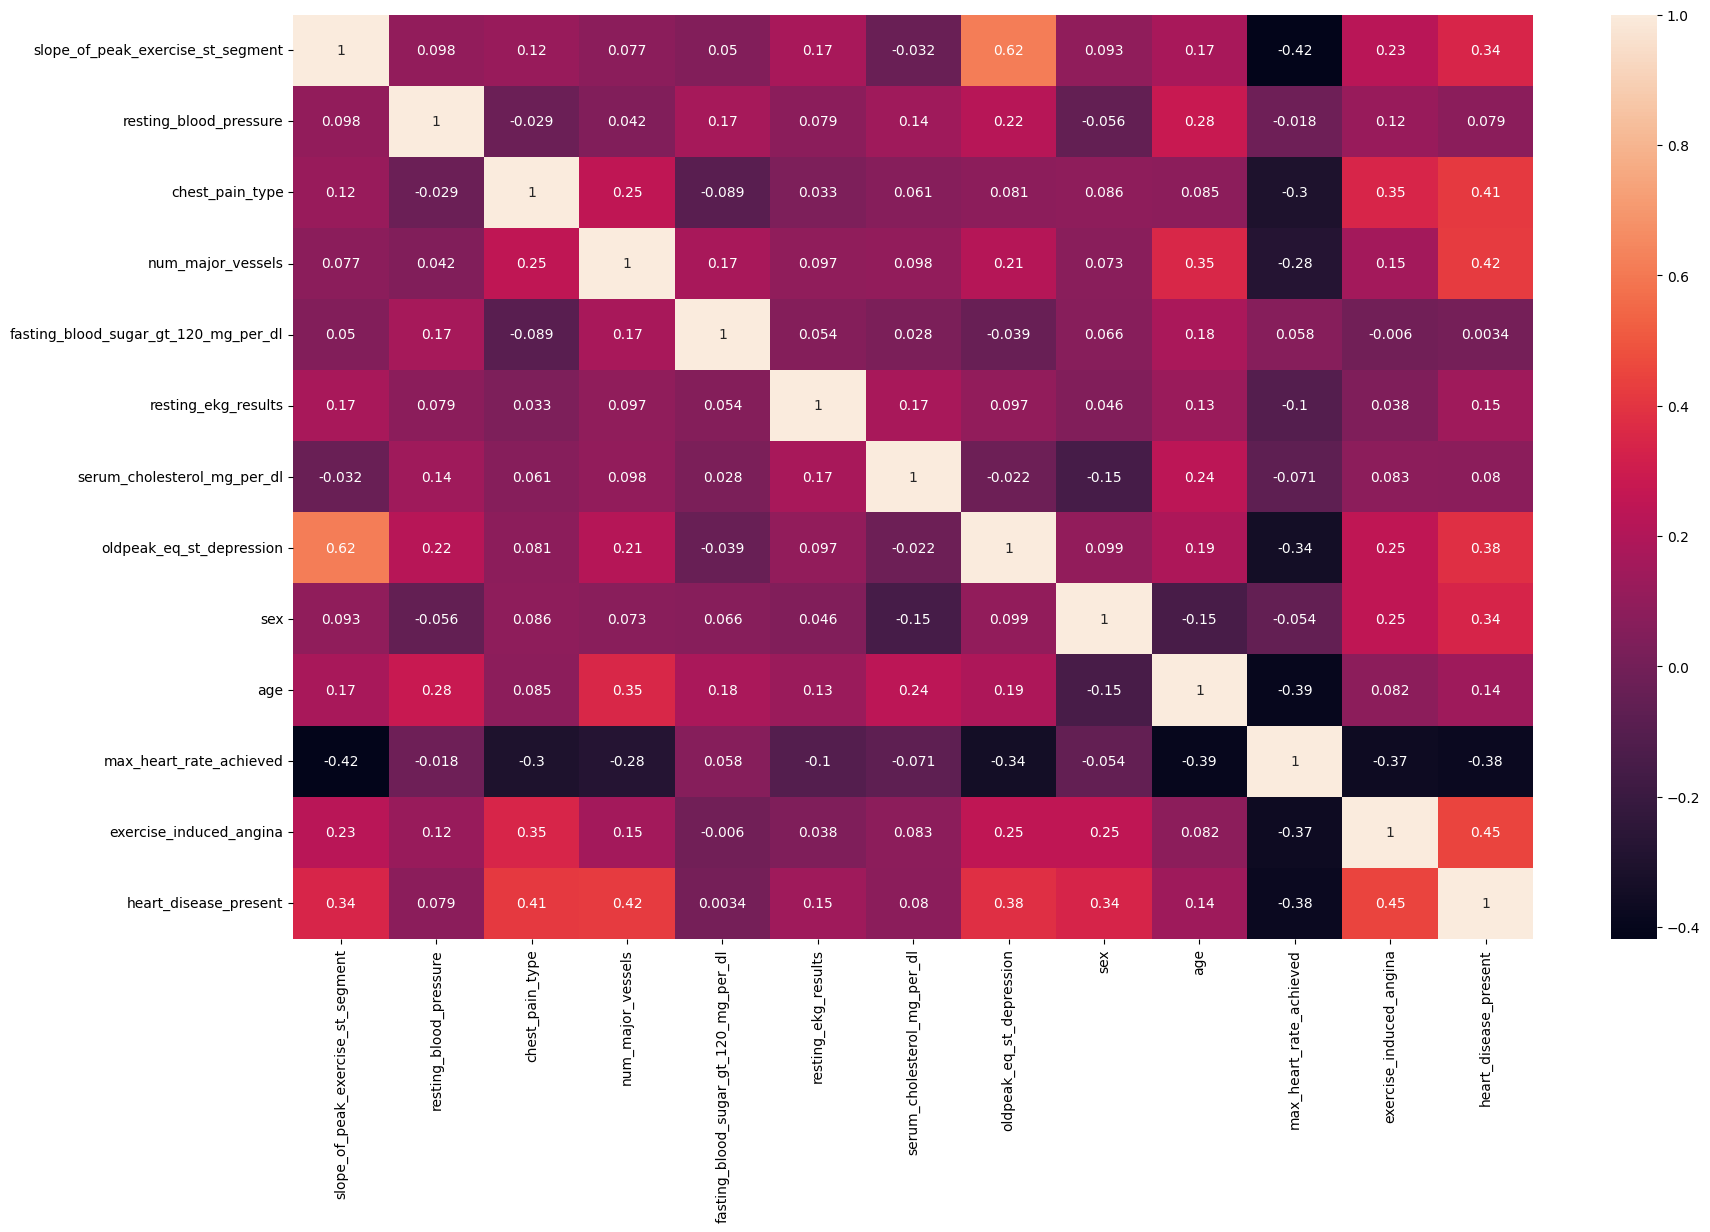

In [38]:
df_numeric = df.select_dtypes(include=[float, int])

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
lb=LabelEncoder()
df.thal=lb.fit_transform(df['thal'])

In [41]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
thal,180.0,1.366667,0.568247,0.0,1.00,1.0,2.00,2.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0


## Model Building

#### Implementing change from EDA insights 

In [43]:
lb=LabelEncoder()
df.thal=lb.fit_transform(df['thal'])

In [44]:
X = df.drop(["heart_disease_present","patient_id"], axis = 1)
y = df.heart_disease_present


#### Oversampling to match the target variable

In [45]:
oversampling_check = pd.DataFrame(df.heart_disease_present.value_counts())
oversampling_check.rename(columns = {'heart_disease_present':'Before Count'}, inplace = True)

In [46]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority', random_state = 1)

In [48]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [49]:
df_over = pd.DataFrame(y_over.value_counts())
print("Before and After Oversampling Count")
oversampling_check.merge(df_over, left_index = True, right_index = True).rename(columns = {'heart_disease_present':'After Count'})

Before and After Oversampling Count


,count_x,count_y
heart_disease_present,,
0,100,100
1,80,100


#### Remarks:
Using the oversampling function, the positive case can now be over sampled to match the negative values

#### Splitting the dataset into train_test 80% to 20%

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
train_x, test_x, train_y, test_y = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over, random_state=42)

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [53]:
class Model:
    scores = {'Model':[], 'Accuracy':[], 'CV_Score':[], 'auc':[]}
    
    def __init__(self, model, model_name):
        self.model = model
        self.model_name = model_name
        
    def predict(self):
        self.model.fit(train_x, train_y)
        pred = self.model.predict(test_x)
        
        cv_score = np.mean(cross_val_score(self.model, test_x, test_y, cv=5))
        auc = roc_auc_score(test_y, pred)
        fpr, tpr, thresholds = roc_curve(test_y, pred)
        
        self.performance(pred, cv_score, auc)
        plt.show()
        self.plot_roc_curve(fpr, tpr)
    
    def performance(self, pred, cv_score, auc):
        accuracy = accuracy_score(pred, test_y)
        
        Model.scores['Model'].append(self.model_name)
        Model.scores['Accuracy'].append(accuracy)
        Model.scores['CV_Score'].append(cv_score)
        Model.scores['auc'].append(auc)
        
        print(f'Accuracy Score: {accuracy}')
        print(f'Mean Cross Validation Score: {cv_score}\n')
        print(f'Classification Report\n{classification_report(pred, test_y)}')
        
        self.confusion_matrix(pred)
        
    def confusion_matrix(self, pred):
        cm = confusion_matrix(test_y, pred)
        return sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
    
    ## visualizing the roc plot
    def plot_roc_curve(self, fpr, tpr):# function to plot roc curve
        plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')# assigning name to  x axis
        plt.ylabel('True Positive Rate')# assigning name to y axis
        plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
        plt.legend()#area describing the elements of the graph
        plt.show()#to show graph without location

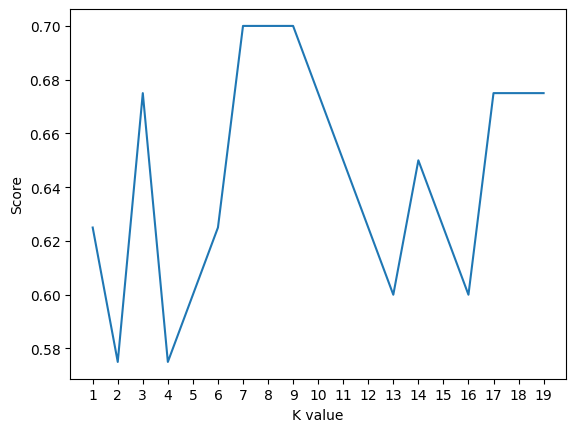

Accuracy Score: 0.6
Mean Cross Validation Score: 0.675

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.61      0.58        18
           1       0.65      0.59      0.62        22

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.61      0.60      0.60        40



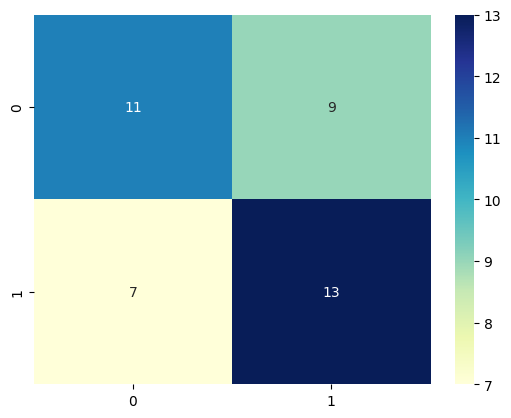

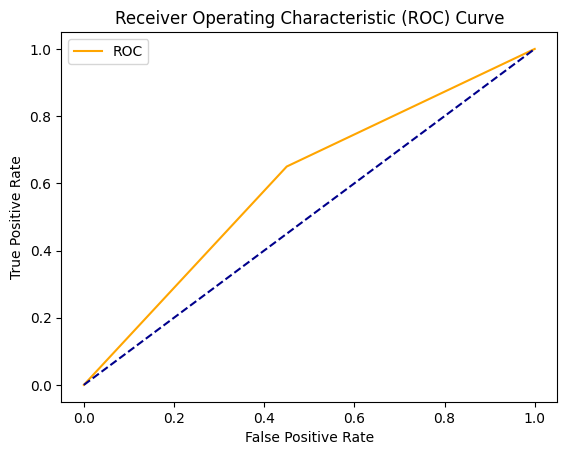

Maximum KNN Score is 70.00%


In [54]:
from sklearn.neighbors import KNeighborsClassifier
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(train_x, train_y)
    scoreList.append(knn2.score(test_x, test_y))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

model = Model(KNeighborsClassifier(), 'KNN')
model.predict()

acc = max(scoreList)*100
model = acc
print("Maximum KNN Score is {:.2f}%".format(acc))


Accuracy Score: 0.85
Mean Cross Validation Score: 0.675

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.95      0.79      0.86        24

    accuracy                           0.85        40
   macro avg       0.85      0.86      0.85        40
weighted avg       0.87      0.85      0.85        40



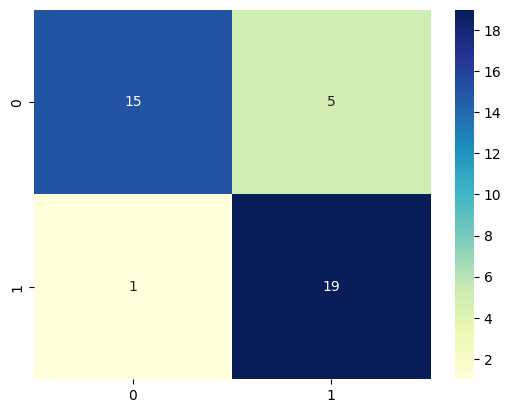

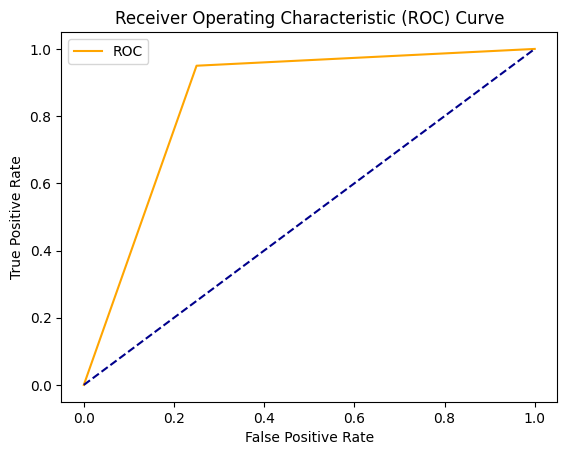

In [55]:
from sklearn.tree import DecisionTreeClassifier

model = Model(DecisionTreeClassifier(random_state = 20), 'Decision Tree')
model.predict()

Accuracy Score: 0.85
Mean Cross Validation Score: 0.675

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.90      0.82      0.86        22

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.86      0.85      0.85        40



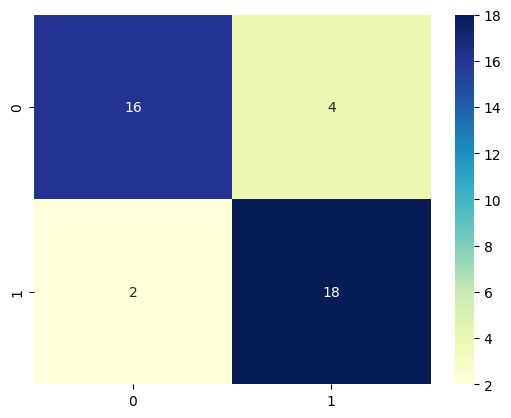

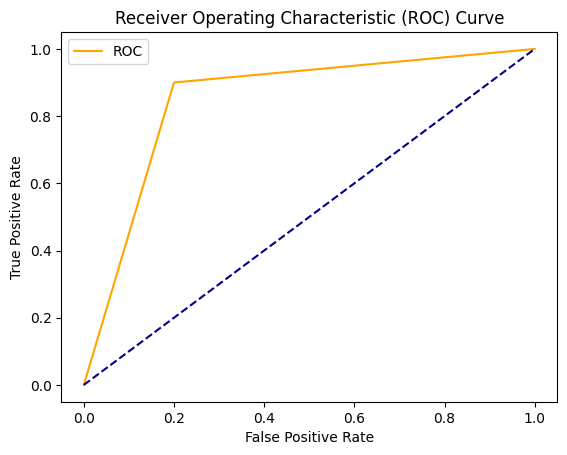

In [56]:
from sklearn.naive_bayes import GaussianNB

model = Model(GaussianNB(), 'Gaussian NB')
model.predict()

Accuracy Score: 0.8
Mean Cross Validation Score: 0.725

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.90      0.75      0.82        24

    accuracy                           0.80        40
   macro avg       0.80      0.81      0.80        40
weighted avg       0.82      0.80      0.80        40



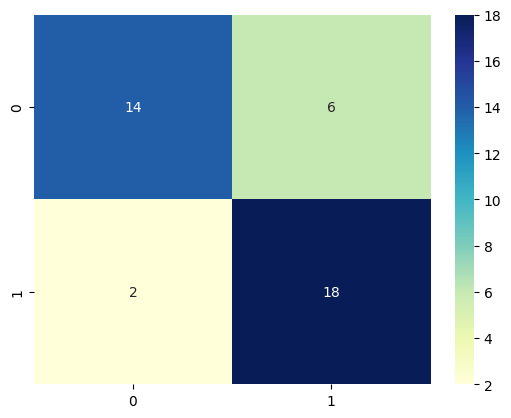

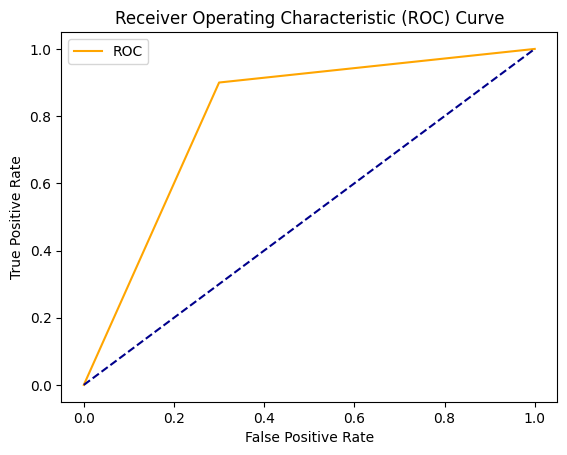

In [57]:
from sklearn.linear_model import LogisticRegression

model = Model(LogisticRegression(random_state = 20), 'Logistic Regression')
model.predict()

Accuracy Score: 0.65
Mean Cross Validation Score: 0.475

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.69      0.61        16
           1       0.75      0.62      0.68        24

    accuracy                           0.65        40
   macro avg       0.65      0.66      0.65        40
weighted avg       0.67      0.65      0.65        40



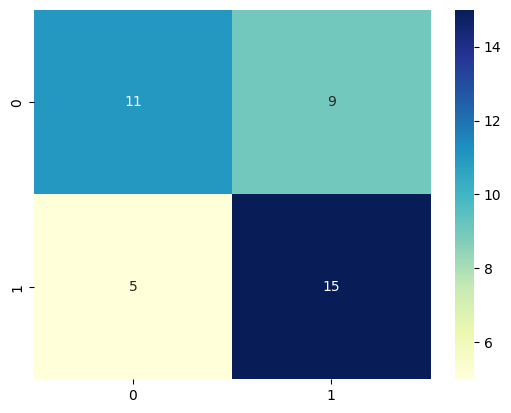

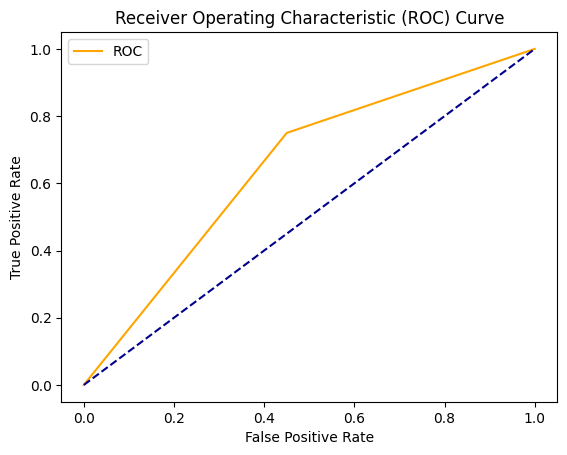

In [58]:
from sklearn.svm import SVC

model = Model(SVC(random_state = 20), 'SVC')
model.predict()

Accuracy Score: 0.85
Mean Cross Validation Score: 0.7

Classification Report
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       1.00      0.77      0.87        26

    accuracy                           0.85        40
   macro avg       0.85      0.88      0.85        40
weighted avg       0.89      0.85      0.85        40



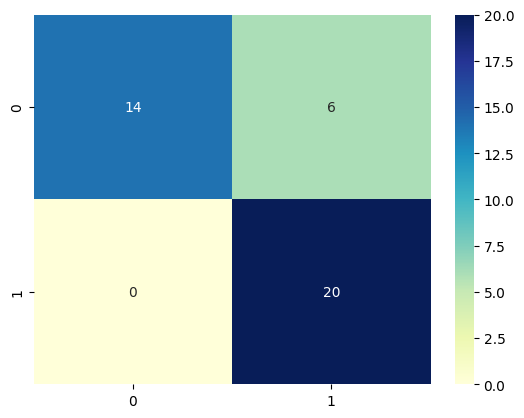

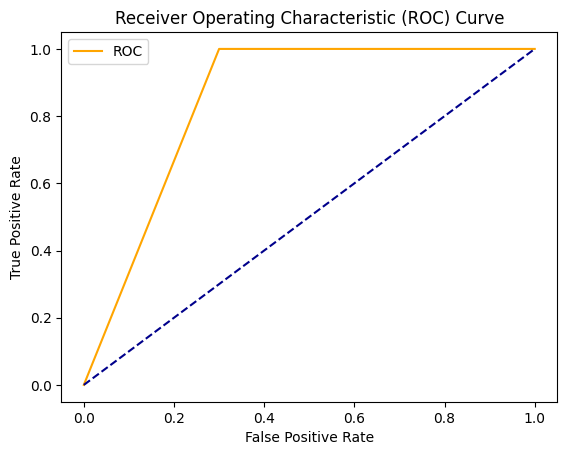

In [59]:
from sklearn.ensemble import AdaBoostClassifier
 

model = Model(AdaBoostClassifier(random_state = 20), 'AdaBoostClassifier')
model.predict()

Accuracy Score: 0.875
Mean Cross Validation Score: 0.775

Classification Report
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       1.00      0.80      0.89        25

    accuracy                           0.88        40
   macro avg       0.88      0.90      0.87        40
weighted avg       0.91      0.88      0.88        40



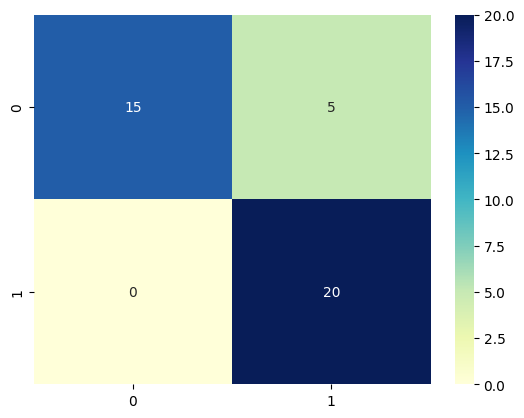

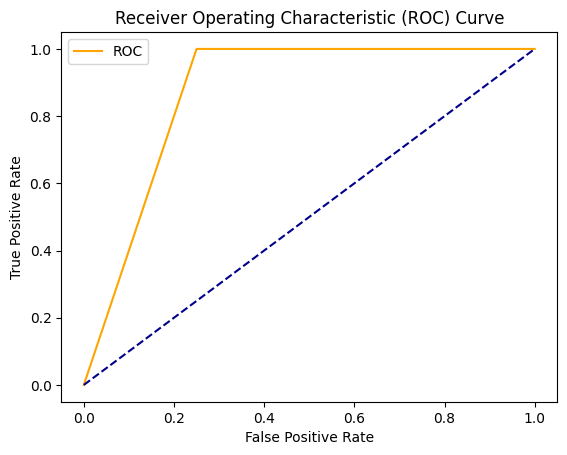

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

model = Model(GradientBoostingClassifier(random_state = 20), 'GradientBoostingClassifier')
model.predict()

### Model Evaluation

In [61]:
performance_df_ = pd.DataFrame(Model.scores)
performance_df_.sort_values(by='Accuracy', ascending=False, inplace=True)
performance_df_.reset_index(drop = True, inplace = True)

performance_df_['Scaling'] = False
performance_df_

,Model,Accuracy,CV_Score,auc,Scaling
0,GradientBoostingClassifier,0.875,0.775,0.875,False
1,Decision Tree,0.850,0.675,0.850,False
2,Gaussian NB,0.850,0.675,0.850,False
3,AdaBoostClassifier,0.850,0.700,0.850,False
4,Logistic Regression,0.800,0.725,0.800,False
5,SVC,0.650,0.475,0.650,False
6,KNN,0.600,0.675,0.600,False


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_train_x = scaler.fit_transform(train_x)
scaled_test_x = scaler.fit_transform(test_x)

In [63]:
class Model:
    scores = {'Model':[], 'Accuracy':[], 'CV_Score':[], 'auc':[]}
    pred_roc = []
    
    def __init__(self, model, model_name):
        self.model = model
        self.model_name = model_name
        
    def predict(self):
        self.model.fit(scaled_train_x, train_y)
        pred = self.model.predict(scaled_test_x)
        cv_score = np.mean(cross_val_score(self.model, scaled_test_x, test_y, cv=5))
        auc = roc_auc_score(test_y, pred)
        fpr, tpr, thresholds = roc_curve(test_y, pred)
        
        self.pred = pred
        self.preda = self.model.predict_proba(scaled_test_x)
        Model.pred_roc.append(pd.Series(self.preda[:,1]))

    
        
        self.performance(pred, cv_score, auc)
        plt.show()
        self.plot_roc_curve(fpr, tpr)
        
    def performance(self, pred, cv_score, auc):
        accuracy = accuracy_score(pred, test_y)
        
        Model.scores['Model'].append(self.model_name)
        Model.scores['Accuracy'].append(accuracy)
        Model.scores['CV_Score'].append(cv_score)
        Model.scores['auc'].append(auc)
        
        print(f'Accuracy Score: {accuracy}')
        print(f'Mean Cross Validation Score: {cv_score}\n')
        print(f'Classification Report\n{classification_report(pred, test_y)}')
        
        self.confusion_matrix(pred)
        
    def confusion_matrix(self, pred):
        cm = confusion_matrix(test_y, pred)
        return sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
    
    
        ## visualizing the roc plot
    def plot_roc_curve(self, fpr, tpr):# function to plot roc curve
        plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')# assigning name to  x axis
        plt.ylabel('True Positive Rate')# assigning name to y axis
        plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
        plt.legend()#area describing the elements of the graph
        plt.show()#to show graph without location
        
        
        
    def predict_optimal_threshold(delf, threshold):
        self.model.fit(scaled_train_x, train_y)
        pred = self.model.predict_proba(scaled_test_x)[:,1]
        pred = [1 if x > threshold else 0 for x in pred]
        cv_score = np.mean(cross_val_score(self.model, scaled_test_x, test_y, cv=5))
        auc = roc_auc_score(test_y, pred)
        fpr, tpr, thresholds = roc_curve(test_y, pred)
        
        self.pred = pred
        self.preda = self.model.predict_proba(scaled_test_x)
        Model.pred_roc.append(pd.Series(self.preda[:,1]))
        
        self.performance(pred, cv_score, auc)
        plt.show()
        self.plot_roc_curve(fpr, tpr)               

Accuracy Score: 0.875
Mean Cross Validation Score: 0.85

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       0.90      0.86      0.88        21

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.88        40



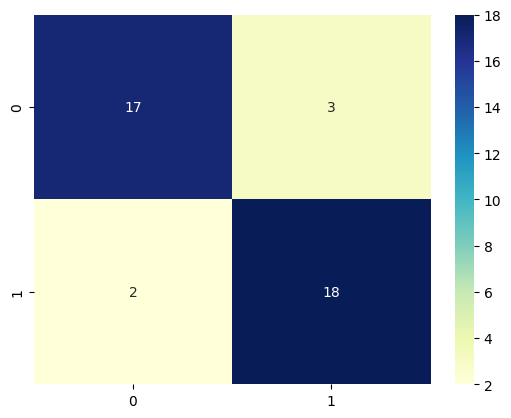

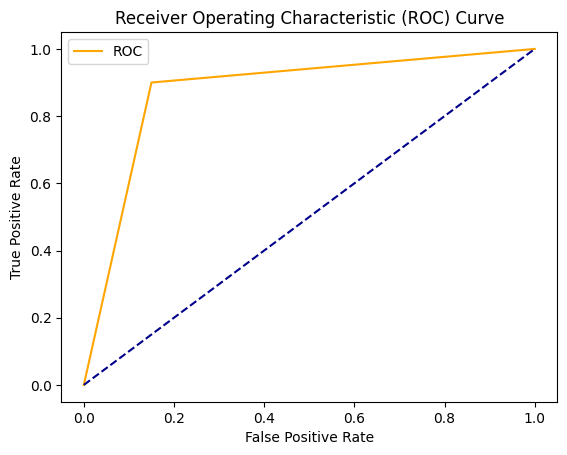

In [64]:
from sklearn.neighbors import KNeighborsClassifier

model = Model(KNeighborsClassifier(), 'KNN')
model.predict()

Accuracy Score: 0.875
Mean Cross Validation Score: 0.675

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.95      0.83      0.88        23

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.89      0.88      0.88        40



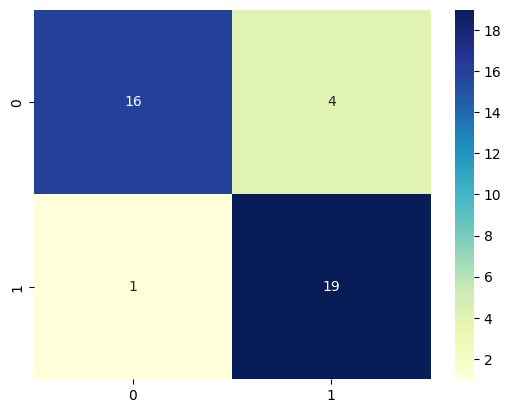

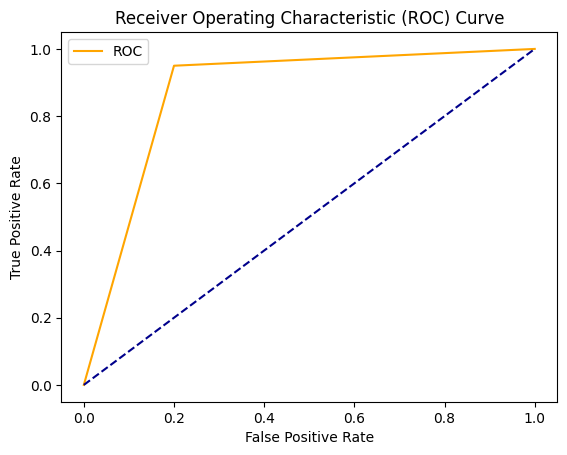

In [65]:
from sklearn.tree import DecisionTreeClassifier

model = Model(DecisionTreeClassifier(random_state = 20), 'Decision Tree')
model.predict()

Accuracy Score: 0.825
Mean Cross Validation Score: 0.6

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.80      0.84      0.82        19

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



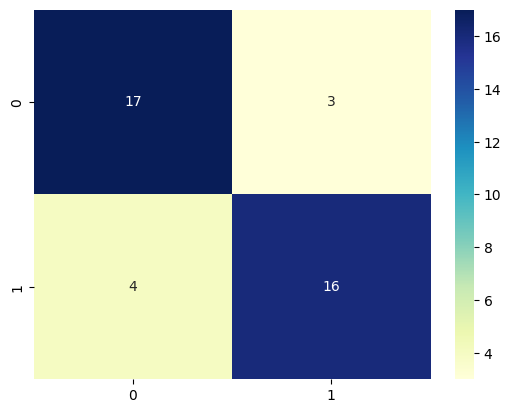

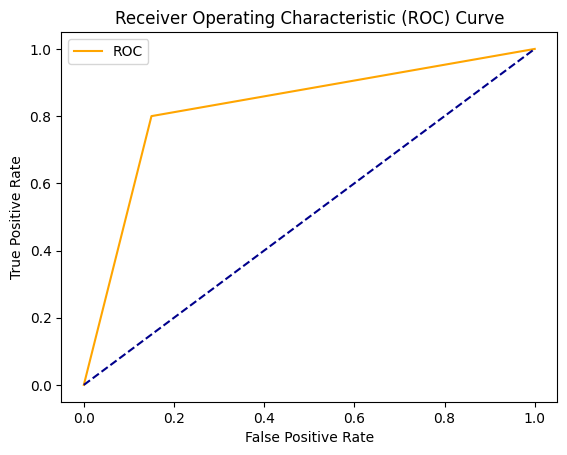

In [66]:
from sklearn.naive_bayes import GaussianNB

model = Model(GaussianNB(), 'Gaussian NB')
model.predict()

Accuracy Score: 0.85
Mean Cross Validation Score: 0.725

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.90      0.82      0.86        22

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.86      0.85      0.85        40



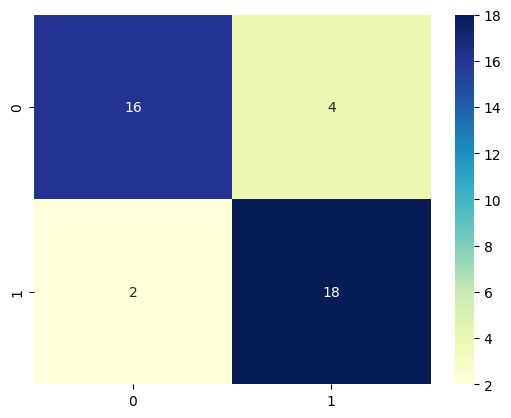

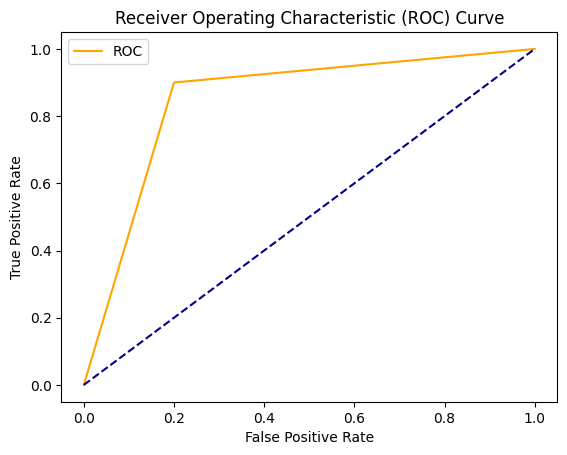

In [67]:
from sklearn.linear_model import LogisticRegression

model = Model(LogisticRegression(random_state = 20), 'Logistic Regression')
model.predict()

Accuracy Score: 0.875
Mean Cross Validation Score: 0.7

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.95      0.83      0.88        23

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.89      0.88      0.88        40



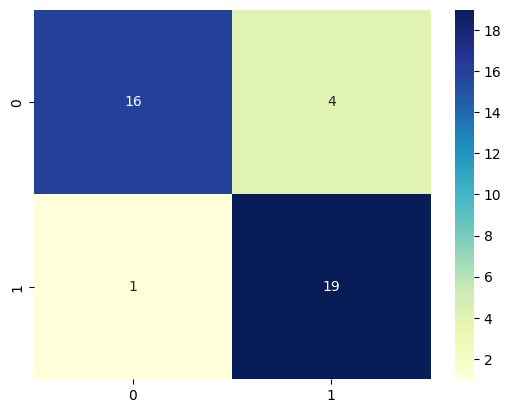

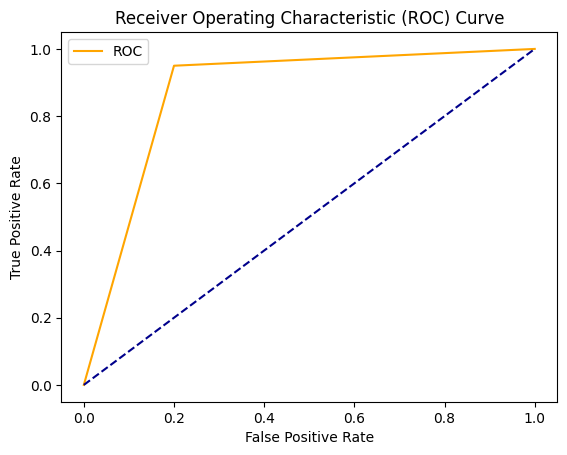

In [68]:
from sklearn.ensemble import AdaBoostClassifier
 

model = Model(AdaBoostClassifier(random_state = 42), 'AdaBoostClassifier')
model.predict()

Accuracy Score: 0.9
Mean Cross Validation Score: 0.775

Classification Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.83      0.91        24

    accuracy                           0.90        40
   macro avg       0.90      0.92      0.90        40
weighted avg       0.92      0.90      0.90        40



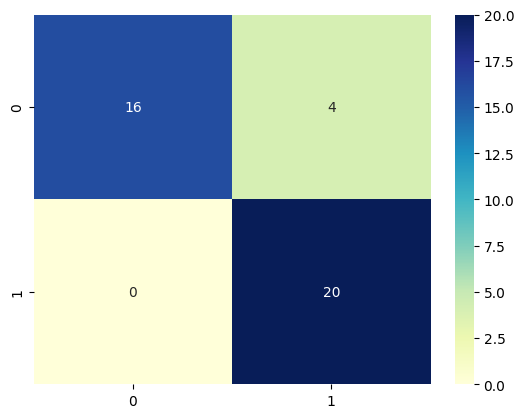

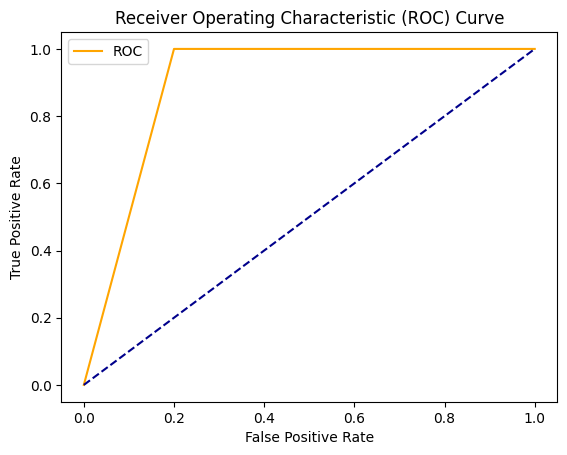

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

model = Model(GradientBoostingClassifier(random_state = 20), 'GradientBoostingClassifier')
model.predict()

Accuracy Score: 0.9
Mean Cross Validation Score: 0.725

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.95      0.86      0.90        22

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



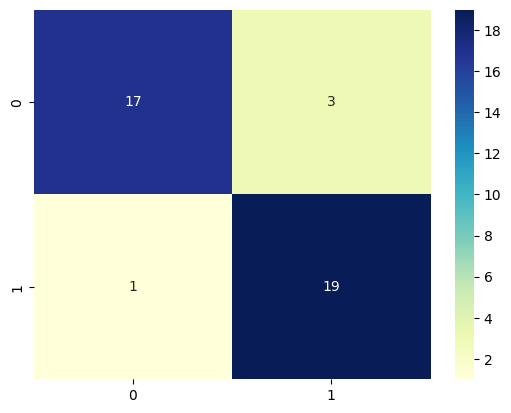

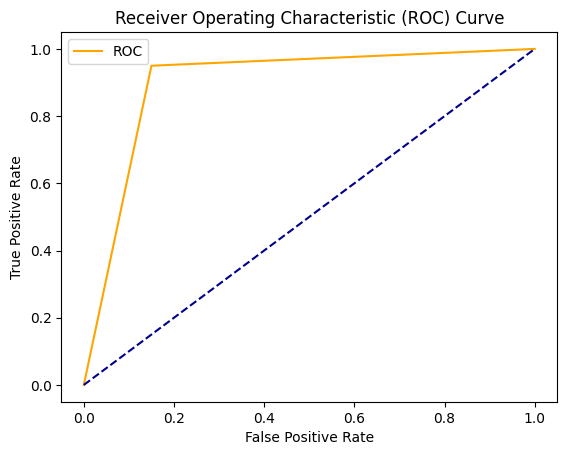

In [70]:
from sklearn.svm import SVC

model = Model(SVC(random_state = 20, probability = True), 'SVC')
model.predict()

In [71]:
performance_df_scaled = pd.DataFrame(Model.scores)
performance_df_scaled.sort_values(by='auc', ascending=False, inplace=True)
performance_df_scaled.reset_index(drop = True, inplace = True)

performance_df_scaled['Scaling'] = True

In [72]:
pd.concat([performance_df_scaled, performance_df_]).reset_index(drop = True)

,Model,Accuracy,CV_Score,auc,Scaling
0,GradientBoostingClassifier,0.900,0.775,0.900,True
1,SVC,0.900,0.725,0.900,True
2,KNN,0.875,0.850,0.875,True
3,Decision Tree,0.875,0.675,0.875,True
4,AdaBoostClassifier,0.875,0.700,0.875,True
5,Logistic Regression,0.850,0.725,0.850,True
6,Gaussian NB,0.825,0.600,0.825,True
7,GradientBoostingClassifier,0.875,0.775,0.875,False
8,Decision Tree,0.850,0.675,0.850,False
9,Gaussian NB,0.850,0.675,0.850,False


## Best Model Performance Summary

#### since Gradient Boosting Classifier with feature scaling has more accuracy when compared to other models it is selected as the best performing model

Accuracy Score: 0.9
Mean Cross Validation Score: 0.775

Classification Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.83      0.91        24

    accuracy                           0.90        40
   macro avg       0.90      0.92      0.90        40
weighted avg       0.92      0.90      0.90        40



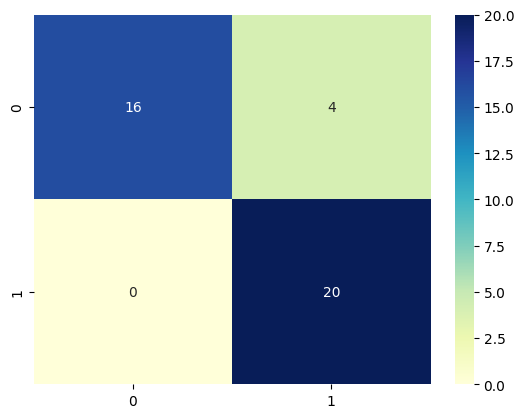

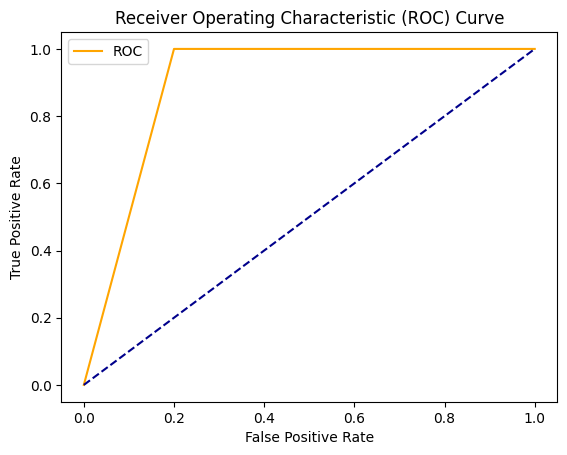

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

model = Model(GradientBoostingClassifier(random_state = 20), 'GradientBoostingClassifier')
model.predict()

# Saving the Best Model as a Pickle

In [74]:
import pickle

pickle.dump(model.model, open('PTID-CDS-MAR22 -1283_PRCP-10116-HeartD - Model.pkl', 'wb'))